## ANALISIS DE LOS PARAMETROS DE LAS VALORACIONES DE CERVEZA


##### FUENTE:

Tanya Cashorali, Data & Analytics Entrepreneur

En una conferencia presentó como ejemplo una aproximación a un posible análisis de el dataset 'beer_reviews.csv' de BeerAdvocate en sus diapositivas 26 y 27 y he usado esas preguntas como punto de partida de este analisis.

https://www.slideshare.net/tanyacash/strata-2017-nyc-how-to-hire-and-test-for-data-skills-a-onesizefitsall-interview-kit


##### OBJETIVO:

VAMOS A HACER UN ANALISIS DE LOS PARAMETROS DE LAS CERVEZAS DE VALORACION, EL ABV y EL IBU DE LAS CERVEZAS PARA COMPROBAR COMO INFLUYEN EN EL RESULTADO DE SU VALORACION O COMPRA Y, COMO SE PODRIAN USAR EN EL SISTEMA DE RECOMENDACION.


##### PASOS:

1.- Leeremos el FICHERO DE ENTRADA que sera el fichero de valoraciones resultante del analisis de valoraciones por usuario y por cerveza del paso anterior 'beer_reviews_v2.csv'.

2.- ANALISIS DE ABV E INTESIDAD DE ABV.

    2.1.- ANALISIS INICIAL POR DISTRIBUCIONES DE ABV, INTENSIDAD DE ABV Y LOS PARAMETROS DE LAS CERVEZAS DE VALORACION DE CERVEZAS

    2.2.- ANALISIS DEL ABV Y LA DISTRIBUCION DE SUS VALORACIONES

    2.3.- ANALISIS DE LA POSIBLE RELACION DE LOS PARAMETROS DE VALORACION DE CERVEZAS CON EL ABV Y LA INTENSIDAD DE ABV 

    2.4.- CORRELACION ENTRE LA INTENSIDAD DE ABV Y LOS PARAMETROS DE REVISION

    2.5.- ANALISIS DE IBU MEDIO POR ESTILO DE CERVEZA DE LAS VALORACIONES Y LA DISTRIBUCION DE SUS VALORACIONES 

    2.6.- ANALISIS DE LA POSIBLE RELACION ENTRE EL IBU MEDIO POR ESTILO DE CERVEZA (DE LAS VALORACIONES DE LAS CERVEZAS DE ESE ESTILO) Y LOS PARAMETROS DE VALORACION DE CERVEZAS

    2.7.- CORRELACION ENTRE IBU MEDIO DEL ESTILO DE CERVEZA Y LOS PARAMETROS DE VALORACION

3.- CORRELACION E IMPORTANCIA DE LOS PARAMETROS DE REVISION RESPECTO A LA REVISION GLOBAL 'review_overall' (TARGET)

    3.a.- MATRIZ DE CORRELACION DE LOS PARAMETROS DE REVISION Y LA REVISION GLOBAL 'review_overall'

    3.b.- CORRELACION ENTRE LOS PARAMETROS DE REVISION

    3.c.- FEATURE IMPORTANCE DE LOS PARAMETROS DE REVISION CON MODELO DE REGRESION Decission Tree

4.- AVANCE: POSIBLES FORMULAS DE PUNTUACION (SCORING FORMULAS) PARA EL SISTEMA DE RECOMENDACION

    4.1.- PROPUESTAS DE FORMULAS DE SCORING

    4.2.- ANALISIS DE LOS RANKINGS DE LAS DISTINTAS FORMULAS DE SCORING APLICADAS A CERVEZAS

    4.3.- ANALISIS DE LOS RANKINGS DE LAS DISTINTAS FORMULAS DE SCORING APLICADAS A ESTILOS DE CERVEZAS
    

In [1]:
# Libreria de Analisis de Datos
import pandas as pd
import numpy as np

# Libreria de Graficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libreria Auxiliar
import itertools

#### 1.- LEEREMOS EL FICHERO DE ENTRADA QUE ES EL FICHERO DE VALORACIONES RESULTANTE DE LOS PROCESOS ANTERIORES 'beer_reviews_v2.csv'.

In [2]:
# Leemos el fichero CSV: BEERADVOCATE RATINGS, RESULTANTE DEL PASO ANTERIOR 
reviews_raw = pd.read_csv('./Data/beer_reviews_v2.csv', delimiter=',',\
                          dtype={'brewery_name': str, 'review_profilename': str,\
                                 'beer_style': str, 'beer_name': str})

In [3]:
# Haremos una copia para trabajar con ella
dfreviews = reviews_raw.copy()

nRow, nCol = dfreviews.shape
print('Hay',  nRow, 'filas y', nCol, 'columnas')

# Primer vistazo
dfreviews.head()

Hay 1301173 filas y 13 columnas


,brewery_name,beer_name,beer_style,beer_advocates_style,beer_abv,review_profilename,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,abv_strength
0,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,zyzygy,4.0,4.5,4.0,4.5,4.5,4.3,4
1,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,ypsifly,4.5,4.0,3.0,4.0,4.5,4.0,4
2,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,woemad,4.0,4.5,4.0,4.5,4.5,4.3,4
3,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,wnhay,4.0,4.0,4.5,4.0,4.0,4.1,4
4,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,williamherbert,3.0,3.0,4.5,3.0,3.5,3.4,4


In [4]:
# Estructura original del fichero
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301173 entries, 0 to 1301172
Data columns (total 13 columns):
brewery_name            1301173 non-null object
beer_name               1301173 non-null object
beer_style              1301173 non-null object
beer_advocates_style    1301173 non-null object
beer_abv                1301173 non-null float64
review_profilename      1301173 non-null object
review_overall          1301173 non-null float64
review_aroma            1301173 non-null float64
review_appearance       1301173 non-null float64
review_palate           1301173 non-null float64
review_taste            1301173 non-null float64
review_average          1301173 non-null float64
abv_strength            1301173 non-null int64
dtypes: float64(7), int64(1), object(5)
memory usage: 129.1+ MB


In [5]:
# Los valores STRING se cargan con el TIPO PANDAS object: Convertiremos 'object' a Tipos PANDAS 'category'
# Asi los STRINGS se codificaran como numeros y sera mas eficiente su analisis posterior
dfreviews[dfreviews.select_dtypes(['object']).columns] = \
    dfreviews.select_dtypes(['object']).apply(lambda x: x.astype('category'))

dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301173 entries, 0 to 1301172
Data columns (total 13 columns):
brewery_name            1301173 non-null category
beer_name               1301173 non-null category
beer_style              1301173 non-null category
beer_advocates_style    1301173 non-null category
beer_abv                1301173 non-null float64
review_profilename      1301173 non-null category
review_overall          1301173 non-null float64
review_aroma            1301173 non-null float64
review_appearance       1301173 non-null float64
review_palate           1301173 non-null float64
review_taste            1301173 non-null float64
review_average          1301173 non-null float64
abv_strength            1301173 non-null int64
dtypes: category(5), float64(7), int64(1)
memory usage: 91.3 MB


In [6]:
dfreviews.describe()

,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,abv_strength
count,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06
mean,7.134884e+00,3.844765e+00,3.767165e+00,3.868639e+00,3.773944e+00,3.828190e+00,3.816540e+00,2.837179e+00
std,2.332543e+00,7.017427e-01,6.829077e-01,6.024430e-01,6.649581e-01,7.144168e-01,5.620543e-01,7.831486e-01
min,3.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00
25%,5.300000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,2.000000e+00
50%,6.600000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.900000e+00,3.000000e+00
75%,8.500000e+00,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,4.200000e+00,3.000000e+00
max,4.100000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.900000e+00,4.000000e+00


#### 2.1.- ANALISIS INICIAL POR DISTRIBUCIONES DE ABV, ABV_STRENGTH Y LOS PARAMETROS DE LAS  CERVEZAS DE VALORACION DE CERVEZAS

###### abv_strength

Su distribucion indica que:

1.- Casi todas las cervezas valoradas tienen una Intensidad de ABV entre el 2 y el 4, o sea, entre Medium Strength y Strong Strength.

2.- No obstante, la mayoria de las cervezas valoradas estan entre 2 Medium Strength y 3 High Strength.

###### beer_abv

Su distribucion indica que casi todas las cervezas valoradas tienen ABV menor del 20% y,
parece que la mayoria de las cervezas valoradas tienen un ABV entre 5 y 12%.
No obstante, existen algunas cervezas con ABV del 0% lo cual es llamativo

###### review_appearance, review_aroma, review_overall, review_palate y review_taste

Parece que la mayoria de las cervezas tienen una valoracion entre 3 y 4,5

###### review_average

Refleja una distribucion similar a los parmetros de review y, 
parece que la mayoria de las cervezas tienen una valoracion entre 3 y 4,5


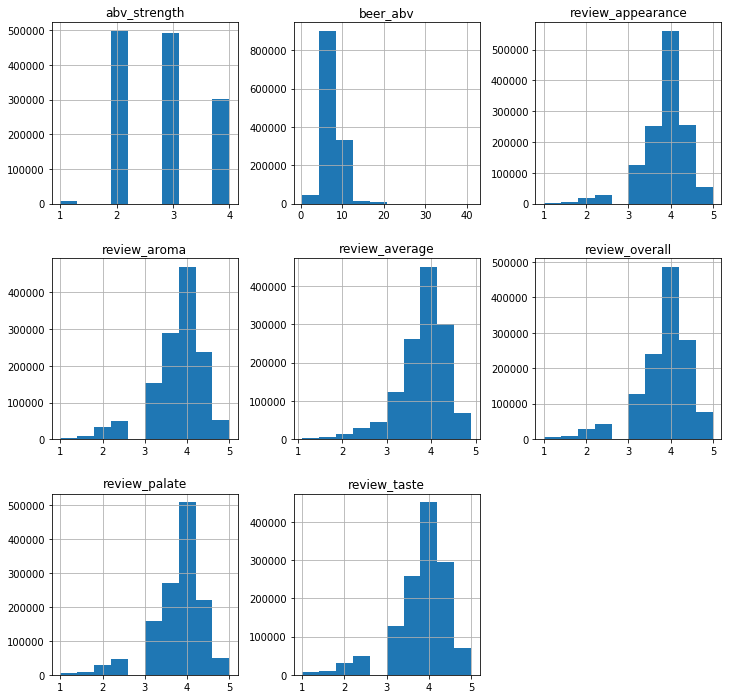

In [7]:
# Histograma of todas las variables numericas
dfreviews.hist(figsize=(12,12))
plt.show()

####  2.2.- ANALIZAREMOS EL ABV Y LA DISTRIBUCION DE SUS VALORACIONES

#### INFORMACION SOBRE ABV

1.- Segun
http://www.elbuenmosto.com/lifestyle/que-significa-ibu-y-abv-en-una-cerveza/

ABV es el acrónimo de Alcohol By Volume (alcohol por volumen) y por lo general se muestra como un porcentaje. 

Este porcentaje nos permite saber entonces cuánto de su cerveza es alcohol y cuánto es de otros elementos -como el agua-.

El porcentaje de ABV de una cerveza puede variar entre entre 1% a 70%, pero lo más común es que fluctúen entre 4% a 6%.


#### INFORMACION SOBRE ABV STRENGTH O INTENSIDAD DE ABV

Segun http://dev.bjcp.org/beer-styles/introduction-to-beer-styles

Low Strength = 1 = intensidad-baja: <4% ABV

Medium Strength = 2 = intensidad-estandar: 4-6% ABV

High Strength = 3 = intensidad-alta: 6-9% ABV

Strong Strength = 4 = intensidad-muy-alta: >9% ABV

In [8]:
dfreviews['beer_abv'].groupby(dfreviews['beer_abv']).count().sort_values(ascending = False).head(10)

beer_abv
5.0     86497
8.0     59608
6.0     54754
9.0     52885
7.0     50136
10.0    49711
5.5     48267
6.5     40937
5.2     36185
7.5     34141
Name: beer_abv, dtype: int64

In [9]:
ratesPerABV = dfreviews[['beer_abv', 'review_average']]\
                .groupby(['beer_abv'], as_index = False) \
                .count() \
                .rename(columns = {'review_average' : 'totalABVRatings'}) \
                .sort_values('totalABVRatings', ascending = False)

ratesPerABV.head(10)

,beer_abv,totalABVRatings
68,5.0,86497
175,8.0,59608
126,6.0,54754
201,9.0,52885
150,7.0,50136
224,10.0,49711
96,5.5,48267
139,6.5,40937
79,5.2,36185
160,7.5,34141


In [10]:
ratesPerABV.tail(10)

,beer_abv,totalABVRatings
84,5.28,2
53,4.76,2
66,4.97,2
167,7.71,2
74,5.12,2
54,4.77,1
20,3.71,1
246,11.01,1
185,8.35,1
8,2.75,1


In [11]:
# EXISTEN CERVEZAS MUY FUERTES POR ENCIMA DE 20% ABV PERO HAY POCAS VALORACIONES PUES HAY UNAS 600
ratesPerABV[ratesPerABV['beer_abv'] >= 20].sort_values('beer_abv', ascending = False)

,beer_abv,totalABVRatings
301,41.00,74
300,32.00,87
299,27.00,339
298,26.00,69
297,21.92,38


In [12]:
# LAS CERVEZAS DE MENOS DE 1% DE ABV seguramente sean CERVEZAS SIN ALCOHOL, HAY POCAS VALORACIONES TAMBIEN
ratesPerABV[ratesPerABV['beer_abv'] <= 1].sort_values('beer_abv', ascending = False)

,beer_abv,totalABVRatings
3,0.50,408
2,0.45,55
1,0.40,65
0,0.30,42


##### RESUMIENDO:

Se podria decir que los usuarios del dataset de BEERADVOCATES en su mayoria beben CERVEZAS entre 2 (Medium Strength) y 3 (High Strength) que no son fuertes en grado alcoholico y, tampoco beben muchas cervezas con grado de alcohol 1 (Low Strength)

In [13]:
# Borraremos las VALORACIONES DE CERVEZAS DE > 20% ABV para facilitar dibujar la distribucion
dfreviewsAux = dfreviews.copy()
dfreviewsAux = dfreviewsAux.drop(dfreviewsAux[dfreviewsAux["beer_abv"] > 20].index)

In [14]:
sns.set(color_codes=True)

##### CONCLUSION:

Con la distribucion de ABV suavizada se consigue apreciar con mas exactitud el Rango de ABV de 
la mayoria de las cervezas valoradas esta entre 4 y 12 (la curva tiene mayor densidad) y no entre 5 y 12 como parecia en el
primer histograma que hicimos

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


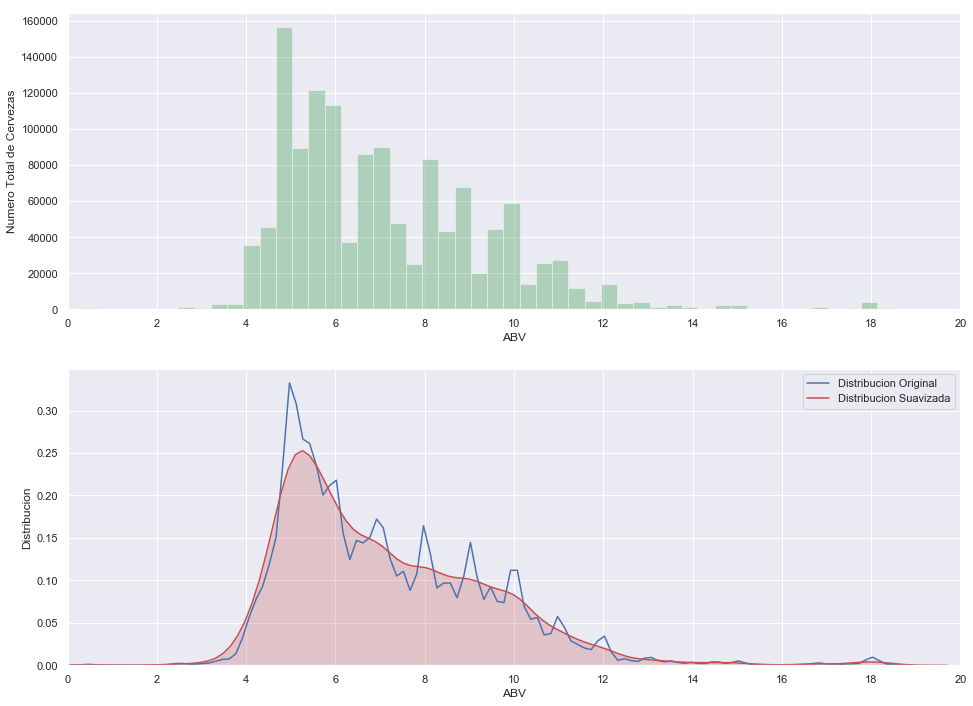

In [15]:
sns.set(rc={"axes.grid": True})
fig, subplot = plt.subplots(nrows=2, figsize=[16, 12])
plt.setp(subplot, xticks=range(0, 21, 2))

sns.distplot(dfreviewsAux["beer_abv"], bins=50, ax=subplot[0], kde=False, color="g") 
             #fit=stats.gamma) #, rug=True)
subplot[0].set_xlim(0, 20)
subplot[0].set_xlabel("ABV")
subplot[0].set_ylabel("Numero Total de Cervezas")

sns.kdeplot(dfreviewsAux["beer_abv"], ax=subplot[1], color="b", label="Distribucion Original")
sns.kdeplot(dfreviewsAux["beer_abv"], ax=subplot[1], color="r", bw=0.4, shade=True, label="Distribucion Suavizada")
             
subplot[1].set_xlim(0, 20)
subplot[1].set_xlabel("ABV")
subplot[1].set_ylabel("Distribucion");


#### 2.3.- ANALIZAREMOS LA RELACION ENTRE ABV Y LOS PARAMETROS DE VALORACION DE CERVEZAS

Segun:
http://www.craftbeer.com/wp-content/uploads/2014/12/craftbeerdotcom-beer-styles.pdf

Alcohol ranges for beer vary from less than 3.2% to greater than 14% ABV. 

ABV sensed in aroma (smell, OLORES), flavor (Taste, Sabor) and palate of beer (sensaciones en la boca).

Por lo tanto, ABV tambien se valora de forma indirecta cuando se valoran aroma, taste y palate, al menos.


###### PARAMETROS DE VALORACION DE CERVEZAS: 

    'review_aroma', 'review_taste', 'review_palate', 'review_appearance', 'review_overall' Y 'review_average'


###### RECORDATORIO SOBRE LA VALORACION DE  CERVEZAS:

Segun https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/

4.50 - 5.00 = World-Class (La mejor del mundo)

4.00 - 4.49 = Outstanding (Excepcional)

3.75 - 3.99 = Very Good (Muy Buena)

3.50 - 3.74 = Good (Buena)

3.00 - 3.49 = Okay (Esta bien)

2.00 - 2.99 = Poor (Mala)

1.00 - 1.99 = Awful (Horrible)

In [16]:
# Redondeamos a VALORES ENTEROS los TARGETS para asegurarnos que tendran VALORES 1, 2, 3, 4 y 5 y,
# para convertirlas en VARIABLES CATEGORICAS para el grafico VIOLINPLOT
dfreviewsAux["review_appearance"] = np.round(dfreviewsAux["review_appearance"])
dfreviewsAux["review_aroma"]      = np.round(dfreviewsAux["review_aroma"])
dfreviewsAux["review_palate"]     = np.round(dfreviewsAux["review_palate"])
dfreviewsAux["review_taste"]      = np.round(dfreviewsAux["review_taste"])
dfreviewsAux["review_overall"]    = np.round(dfreviewsAux["review_overall"])
dfreviewsAux["review_average"]    = np.round(dfreviewsAux["review_average"])

dfreviewsAux["review_appearance"] = dfreviewsAux["review_appearance"].astype(int)
dfreviewsAux["review_aroma"]      = dfreviewsAux["review_aroma"].astype(int)
dfreviewsAux["review_palate"]     = dfreviewsAux["review_palate"].astype(int)
dfreviewsAux["review_taste"]      = dfreviewsAux["review_taste"].astype(int)
dfreviewsAux["review_overall"]    = dfreviewsAux["review_overall"].astype(int)
dfreviewsAux["review_average"]    = dfreviewsAux["review_average"].astype(int)

In [17]:
dfreviewsAux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300566 entries, 0 to 1301172
Data columns (total 13 columns):
brewery_name            1300566 non-null category
beer_name               1300566 non-null category
beer_style              1300566 non-null category
beer_advocates_style    1300566 non-null category
beer_abv                1300566 non-null float64
review_profilename      1300566 non-null category
review_overall          1300566 non-null int64
review_aroma            1300566 non-null int64
review_appearance       1300566 non-null int64
review_palate           1300566 non-null int64
review_taste            1300566 non-null int64
review_average          1300566 non-null int64
abv_strength            1300566 non-null int64
dtypes: category(5), float64(1), int64(7)
memory usage: 101.2 MB


In [18]:
dfreviewsAux.describe()

,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,abv_strength
count,1.300566e+06,1.300566e+06,1.300566e+06,1.300566e+06,1.300566e+06,1.300566e+06,1.300566e+06,1.300566e+06
mean,7.124683e+00,3.816811e+00,3.771360e+00,3.858285e+00,3.778413e+00,3.798973e+00,3.810488e+00,2.836637e+00
std,2.282203e+00,6.521083e-01,6.459785e-01,5.424093e-01,6.308499e-01,6.640792e-01,5.791664e-01,7.829283e-01
min,3.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.300000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00
50%,6.600000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00
75%,8.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00
max,1.850000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00


######  a.- GRAFICOS DE VIOLIN DE PARAMETROS DE VALORACION DE CERVEZA CONTRA EL ABV

Mostraran la DISTRIBUCION DE VALORES DE ABV por cada VALOR 1 a 5 de cada PARAMETRO DE VALORACION

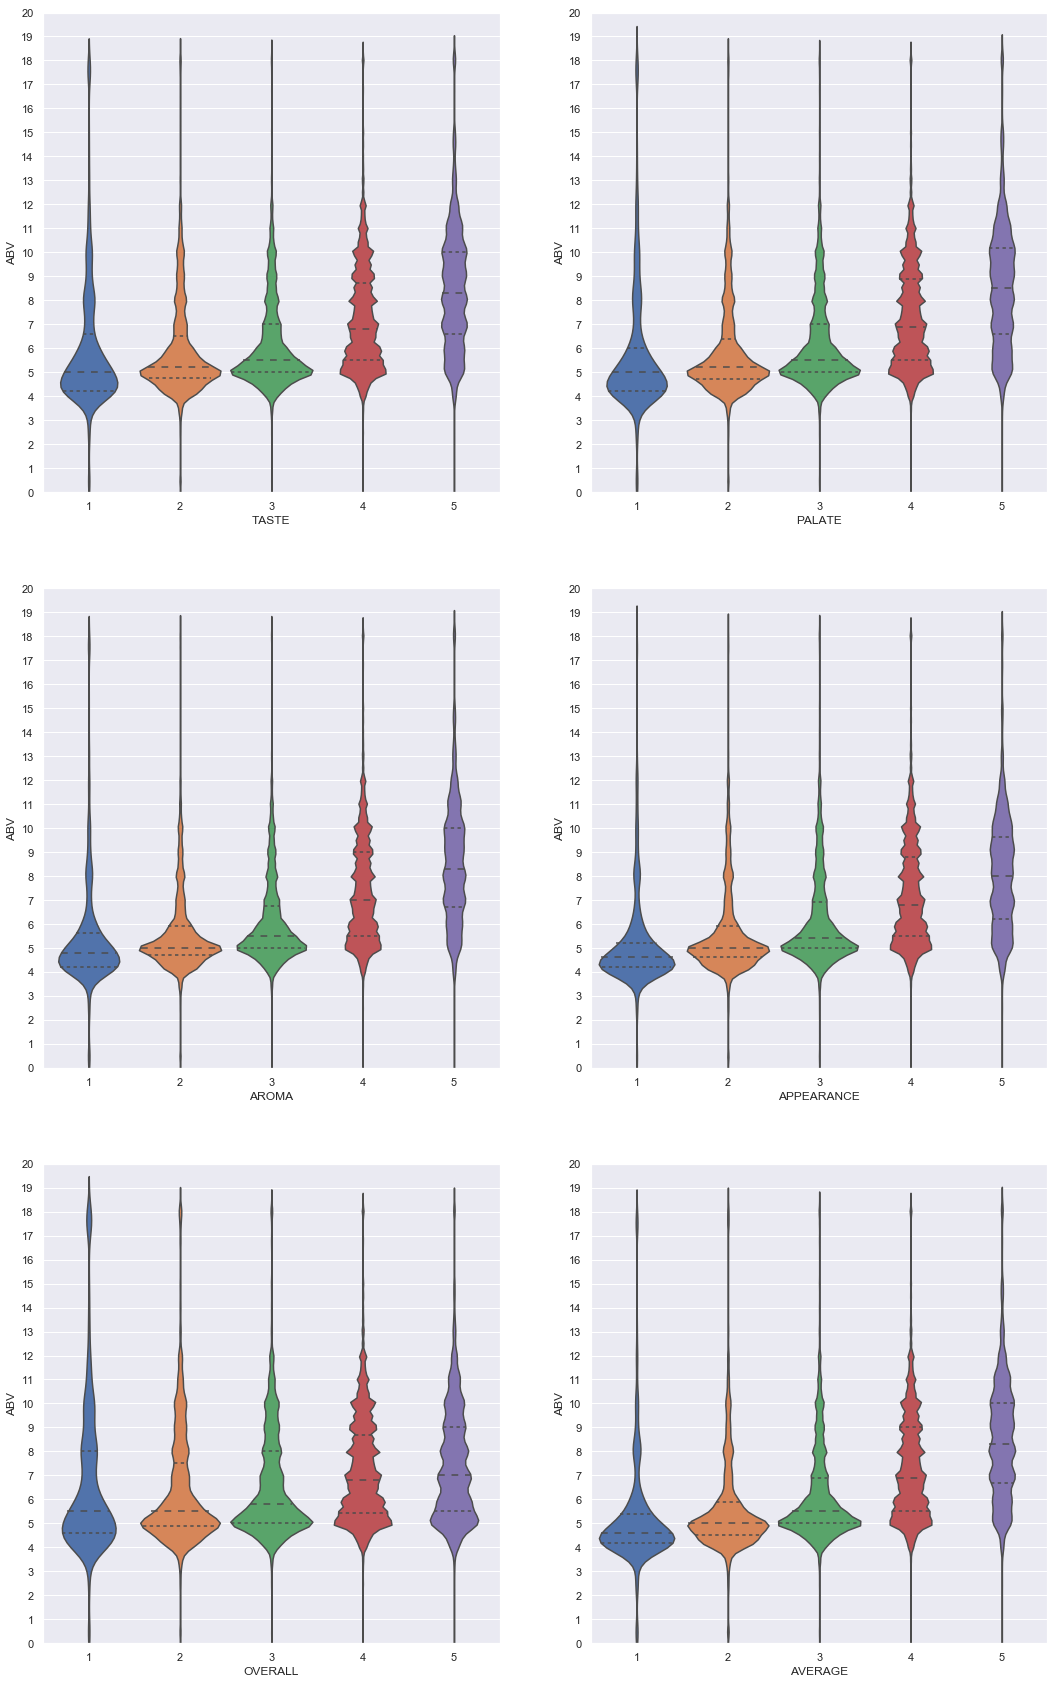

In [19]:
sns.set(rc={"axes.grid": True})
fig, subplot = plt.subplots(nrows=3, ncols=2, figsize=[18, 30])
plt.setp(subplot, yticks=range(0, 21, 1))

xLabels = [['TASTE', 'PALATE'],
           ['AROMA', 'APPEARANCE'],
           ['OVERALL', 'AVERAGE']]

xReviews = [['review_taste', 'review_palate'],
            ['review_aroma', 'review_appearance'],
            ['review_overall', 'review_average']]


for i in range(3):
    for j in range(2):
        sns.violinplot(x=xReviews[i][j], y='beer_abv', data=dfreviewsAux, 
                       ax=subplot[i, j], saturation=0.9, width=0.9, inner="quartile")
        subplot[i, j].set_ylim(0, 20);
        subplot[i, j].set_ylabel("ABV")
        subplot[i, j].set_xlabel(xLabels[i][j])

######  b.- GRAFICOS DE VIOLIN DE PARAMETROS DE VALORACION DE CERVEZA CONTRA LA INTENSIDAD DE ABV

Mostraran la DISTRIBUCION DE VALORES DE INTENSIDAD DE ABV por cada VALOR 1 a 5 de cada PARAMETRO DE VALORACION

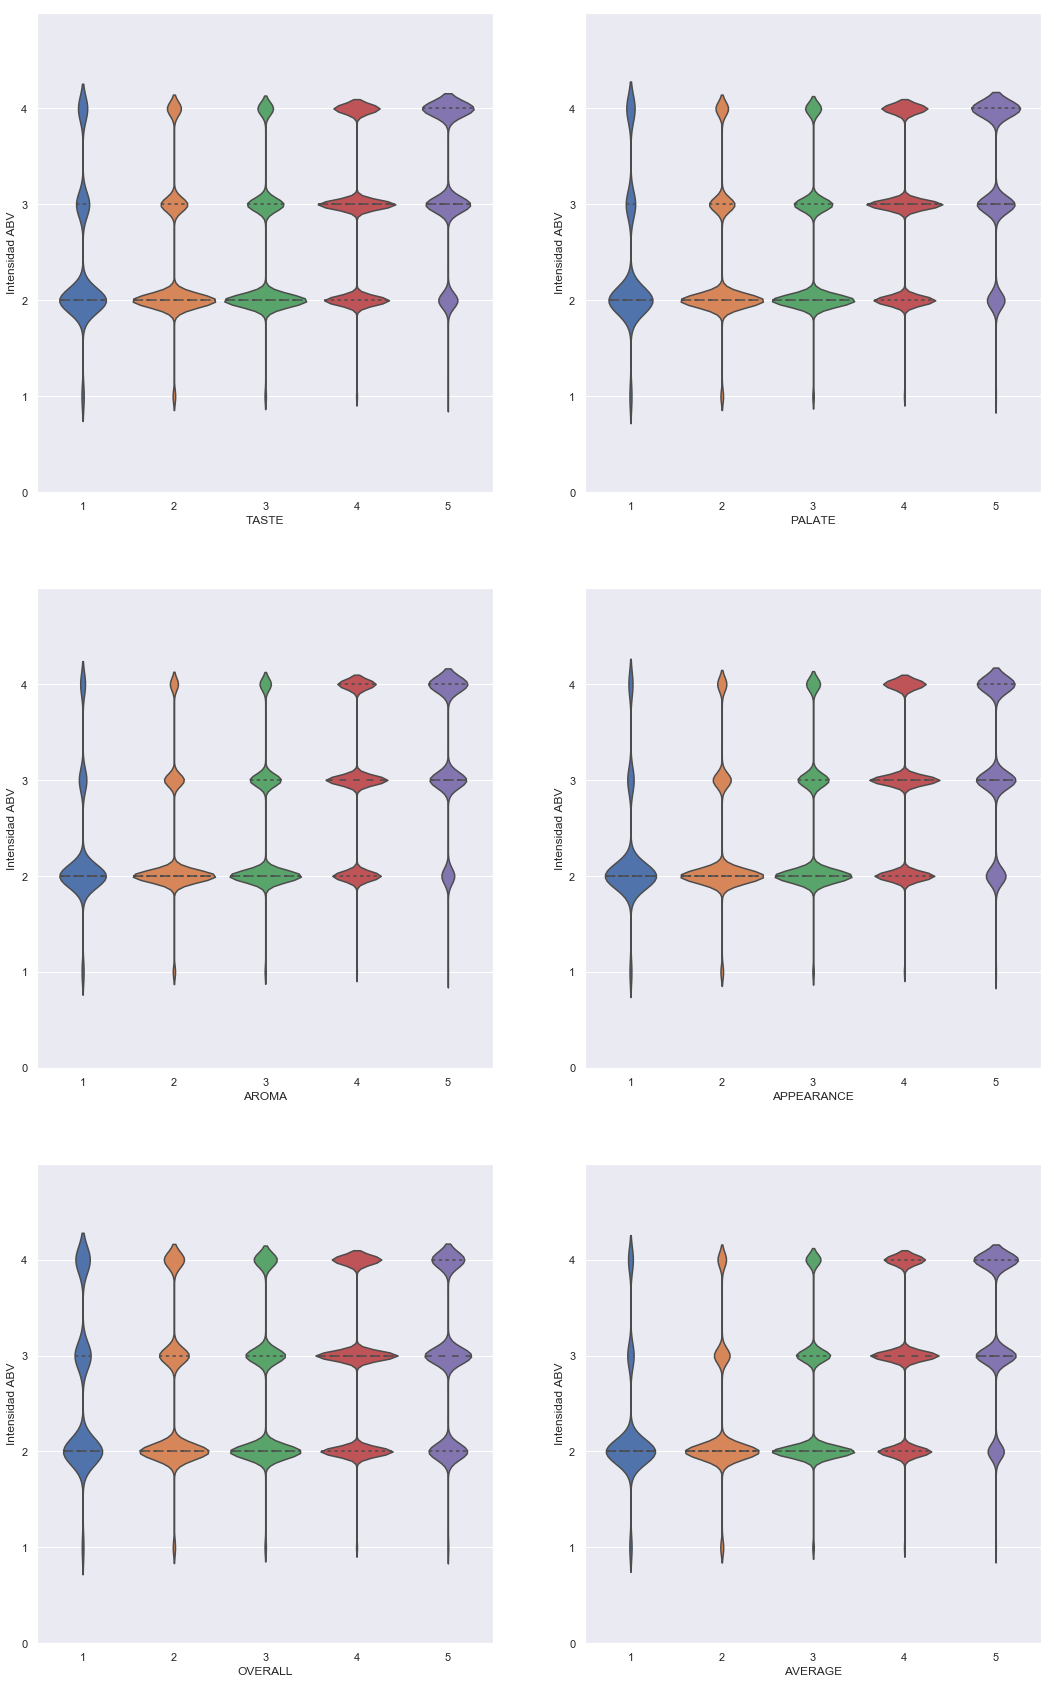

In [20]:
sns.set(rc={"axes.grid": True})
fig, subplot = plt.subplots(nrows=3, ncols=2, figsize=[18, 30])
plt.setp(subplot, yticks=range(0, 5, 1))

xLabels = [['TASTE', 'PALATE'],
           ['AROMA', 'APPEARANCE'],
           ['OVERALL', 'AVERAGE']]

xReviews = [['review_taste', 'review_palate'],
            ['review_aroma', 'review_appearance'],
            ['review_overall', 'review_average']]


for i in range(3):
    for j in range(2):
        sns.violinplot(x=xReviews[i][j], y='abv_strength', data=dfreviewsAux, 
                       ax=subplot[i, j], saturation=0.9, width=0.9, inner="quartile")
        subplot[i, j].set_ylim(0, 5);
        subplot[i, j].set_ylabel("Intensidad ABV")
        subplot[i, j].set_xlabel(xLabels[i][j])

##### CONCLUSIONES DE LOS GRAFICOS VIOLINPLOT DE ABV E INTENSIDAD ABV CONTRA LOS PARAMETROS DE REVISION

En ambos se llega a la misma conclusión y es que se puede estimar que:

a.- Las cervezas que tienen entre 5 (Medium Strength) y 10 (Strong Strength) de ABV son las mejor valoradas, tienen entre 3 (Esta Bien) y 5 (La mejor del mundo) de valoracion.

b.- Con otro punto de vista, las cervezas que tienen entre 2 Medium y 4 Strong de Intensidad de ABV, tambien obtienen las mejores valoraciones, entre 3 (Esta Bien) y 5 (La mejor del mundo) de valoracion.

Aunque es una conclusion algo intuitiva, se confirma con este analisis que el Grado Alcoholico ABV tambien influye en la Valoracion o posible compra de una cerveza ya que, segun sus valoraciones, los clientes prefieren cervezas de Intensidad de ABV entre 4 Medium y mayores que 5 Strong y, las menores de 1 Low Strength tienen menos ganas de valorarlas (les gustarán menos).

Por ello, podría ser un buen candidato para incluir en una formula de scoring o como un parametro posterior de filtrado u ordenacion para adaptar la recomendacion al gusto alcoholico de un cliente.


#### 2.4.- CORRELACION ENTRE LA INTENSIDAD DE ABV Y LOS PARAMETROS DE VALORACION

¿Que pasara si estudiamos la correlacion de los Parametros de Valoracion con la Intensidad de ABV o 'beer_strength'?.

Se comprueba que la Intensidad de ABV tiene poca correlacion con OVERALL.

    No obstante, se comprueba que la Intensidad de ABV tiene un pequeño grado de correlacion con AROMA (28%), PALATE (24%), TASTE (24%), una correlacion que no es desdeñable y demuestra la influencia del ABV en esos tres parametros de una cerveza y, de forma indirecta en la valoracion OVERALL.

In [21]:
reviewParams = ['abv_strength', \
                'review_taste', 'review_palate', 'review_aroma', 'review_appearance']

# Create a correlation matrix 
corrMetrics2 = dfreviewsAux[reviewParams].corr()
corrMetrics2.style.background_gradient(cmap='YlGnBu')

,abv_strength,review_taste,review_palate,review_aroma,review_appearance
abv_strength,1,0.239665,0.245745,0.285247,0.227819
review_taste,0.239665,1,0.643495,0.627964,0.456373
review_palate,0.245745,0.643495,1,0.533242,0.477878
review_aroma,0.285247,0.627964,0.533242,1,0.484155
review_appearance,0.227819,0.456373,0.477878,0.484155,1


In [22]:
# Para un DIAGRAMA DE BARRAS quitare la columna de correlacion de 'abv_strength'
paramsCorr2 = corrMetrics2[['abv_strength']] \
    .drop(['abv_strength']) \
    .reset_index() \
    .rename(columns = {'index' : 'review_parameter'}) \
    .sort_values('abv_strength', ascending=False)
paramsCorr2

,review_parameter,abv_strength
2,review_aroma,0.285247
1,review_palate,0.245745
0,review_taste,0.239665
3,review_appearance,0.227819


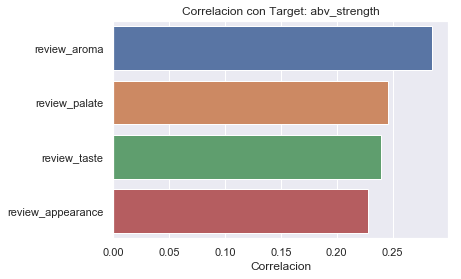

<Figure size 864x576 with 0 Axes>

In [23]:
# DIAGRAMA DE BARRAS SEABORN DE CORRELACION DE LOS PARAMETROS DE REVISION CONTRA LA INTENSIDAD DE ABV
sns.barplot(data=paramsCorr2, y="review_parameter", x="abv_strength")
plt.ylabel(""); 
plt.xlabel("Correlacion")
plt.title("Correlacion con Target: abv_strength")
plt.figure(figsize=(12,8))
plt.show()

#### 2.5.- ANALISIS DE IBU Y LA DISTRIBUCION DE SUS VALORACIONES (DISTRIBUCION GRAFICA)

#### Qué es el IBU?

http://www.elbuenmosto.com/lifestyle/que-significa-ibu-y-abv-en-una-cerveza/

Al igual que ABV, IBU (International Bitterness Units o Unidades Internacionales Amargor en español) es otra de las medida comunes en el mundo cervecero, el IBU mide el amargor del lúpulo en una cerveza, y la escala de medición va de 0 a 100 -aunque hay etiquetas que sobrepasan el 100. 

En términos más técnicos, IBU mide los ácidos alfa isomerizados del lúpulo en una cerveza en partes por millón

##### Reutilizamos la funcion get_ibu_range_avg(str_ibu_range)

Se usara para poder calcular la MEDIA de IBU o AMARGOR de cada ESTILO DE CERVEZA a partir del MAXIMO Y MINIMO de su RANGO DE IBU, 'ibu_range' en 'beer_styles_v1.csv'.

In [24]:
def get_ibu_range_avg(str_ibu_range):
    # SEPARADOR '-'
    if str_ibu_range.find('-') != -1:
        separatorChar = '-'
    
    # SEPARADOR '–'
    if str_ibu_range.find('–') != -1:
        separatorChar = '–'

    l = str_ibu_range.split(separatorChar)
    #print(l)
    minIBU = float(l[0])
    maxIBU = float(l[1])
    
    beerStyleAvgIBU = ((minIBU + maxIBU) / 2)
    
    return beerStyleAvgIBU

In [25]:
get_ibu_range_avg('20-30')

25.0

#### 2.5.a.- LAS VALORACIONES EN FUNCION DE NUESTRO IBU ESTIMADO = IBU MEDIO DEL ESTILO DE UNA CERVEZA

Dado que no existe el valor del IBU de cada cerveza valorada en el DATASET 'beer_reviews.csv' original y que hacer un proceso de web scrapping para obtener dicho dato de cada cerveza del DATASET y el ambito y tiempo para realizar el presente TFM se sobrepasaria de largo (despues de la experiencia previa para los datos de los ESTILOS DE CERVEZA del 2019 y su mapeo posterior con los del 2015),

    he decidido crear y añadir temporalmente una columna nueva 'beer_style_ibu_avg' para cada valor de 'beer_style' y su valor sera la MEDIA DEL MINIMO Y MAXIMO IBU del 'style_name' en 'beer-styles_v1.csv' igual a su correspondiente 'beer_advocates_style' de 'beer_reviews_v2.csv'.

###### Leemos el fichero CSV: BEERADVOCATE DE BEER STYLES DEVUELTO POR EL PASO PREVIO '01.02-Scraping-Additional-Beers-Data.ipynb'

In [26]:
styles_raw = pd.read_csv('./Data/beer_styles_v1.csv', delimiter=',',\
                          dtype={'style_name': str, 'family_name': str, \
                                 'abv_range': str, 'ibu_range': str, 'style_URL': str})

In [27]:
nRowS, nColS = styles_raw.shape
print('Hay',  nRowS, 'filas y', nColS, 'columnas')

# Primer vistazo
styles_raw.head()

Hay 111 filas y 7 columnas


,abv_range,abv_strength,family_name,ibu_range,ibu_strength,style_URL,style_name
0,6.3-7.6%,3,Bocks,20-30,3,https://www.beeradvocate.com/beer/styles/32/,German Bock
1,6.6-7.9%,3,Bocks,17-27,3,https://www.beeradvocate.com/beer/styles/35/,German Doppelbock
2,7.0-14.0%,4,Bocks,25-35,3,https://www.beeradvocate.com/beer/styles/36/,German Eisbock
3,6.3-8.1%,3,Bocks,20-38,3,https://www.beeradvocate.com/beer/styles/33/,German Maibock
4,7.0-9.5%,3,Bocks,15-35,3,https://www.beeradvocate.com/beer/styles/92/,German Weizenbock


In [28]:
styles_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
abv_range       111 non-null object
abv_strength    111 non-null int64
family_name     111 non-null object
ibu_range       111 non-null object
ibu_strength    111 non-null int64
style_URL       111 non-null object
style_name      111 non-null object
dtypes: int64(2), object(5)
memory usage: 6.1+ KB


In [29]:
# Los valores STRING se cargan con el TIPO PANDAS object: Convertiremos  'object' a Tipos PANDAS 'category'
# Asi los STRINGS se codificaran como numeros y sera mas eficiente su analisis posterior
styles_raw[styles_raw.select_dtypes(['object']).columns] = \
    styles_raw.select_dtypes(['object']).apply(lambda x: x.astype('category'))

styles_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
abv_range       111 non-null category
abv_strength    111 non-null int64
family_name     111 non-null category
ibu_range       111 non-null category
ibu_strength    111 non-null int64
style_URL       111 non-null category
style_name      111 non-null category
dtypes: category(5), int64(2)
memory usage: 21.0 KB


In [30]:
dfreviewsAux = reviews_raw.copy()
dfreviewsAux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301173 entries, 0 to 1301172
Data columns (total 13 columns):
brewery_name            1301173 non-null object
beer_name               1301173 non-null object
beer_style              1301173 non-null object
beer_advocates_style    1301173 non-null object
beer_abv                1301173 non-null float64
review_profilename      1301173 non-null object
review_overall          1301173 non-null float64
review_aroma            1301173 non-null float64
review_appearance       1301173 non-null float64
review_palate           1301173 non-null float64
review_taste            1301173 non-null float64
review_average          1301173 non-null float64
abv_strength            1301173 non-null int64
dtypes: float64(7), int64(1), object(5)
memory usage: 129.1+ MB


In [31]:
# Los valores STRING se cargan con el TIPO PANDAS object: Convertiremos  'object' a Tipos PANDAS 'category'
# Asi los STRINGS se codificaran como numeros y sera mas eficiente su analisis posterior
dfreviewsAux[dfreviewsAux.select_dtypes(['object']).columns] = \
    dfreviewsAux.select_dtypes(['object']).apply(lambda x: x.astype('category'))

dfreviewsAux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301173 entries, 0 to 1301172
Data columns (total 13 columns):
brewery_name            1301173 non-null category
beer_name               1301173 non-null category
beer_style              1301173 non-null category
beer_advocates_style    1301173 non-null category
beer_abv                1301173 non-null float64
review_profilename      1301173 non-null category
review_overall          1301173 non-null float64
review_aroma            1301173 non-null float64
review_appearance       1301173 non-null float64
review_palate           1301173 non-null float64
review_taste            1301173 non-null float64
review_average          1301173 non-null float64
abv_strength            1301173 non-null int64
dtypes: category(5), float64(7), int64(1)
memory usage: 91.3 MB


###### AÑADIMOS la columna nueva 'beer_style_ibu_avg'

In [32]:
bs_testing_list = ['American Barleywine', 'German Bock']
for bs in bs_testing_list:
    print('Beer style: "{0}", IBU Range: {1}, Media(IBU Range): {2}'.format(\
                bs, \
                styles_raw[styles_raw['style_name'] == bs]['ibu_range'][0], \
                get_ibu_range_avg(styles_raw[styles_raw['style_name'] == bs]['ibu_range'][0])))


Beer style: "American Barleywine", IBU Range: 60–100, Media(IBU Range): 80.0
Beer style: "German Bock", IBU Range: 20-30, Media(IBU Range): 25.0


In [33]:
dfreviewsAux['beer_style_ibu_avg'] = dfreviewsAux['beer_advocates_style'] \
        .apply(lambda beer_style: \
                      get_ibu_range_avg(styles_raw[styles_raw['style_name'] == beer_style]['ibu_range'][0]))

In [34]:
dfreviewsAux.head()

,brewery_name,beer_name,beer_style,beer_advocates_style,beer_abv,review_profilename,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,abv_strength,beer_style_ibu_avg
0,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,zyzygy,4.0,4.5,4.0,4.5,4.5,4.3,4,80.0
1,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,ypsifly,4.5,4.0,3.0,4.0,4.5,4.0,4,80.0
2,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,woemad,4.0,4.5,4.0,4.5,4.5,4.3,4,80.0
3,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,wnhay,4.0,4.0,4.5,4.0,4.0,4.1,4,80.0
4,Stone Brewing Co.,Stone Old Guardian Barley Wine Style Ale 2006,American Barleywine,American Barleywine,11.2,williamherbert,3.0,3.0,4.5,3.0,3.5,3.4,4,80.0


In [35]:
dfreviewsAux.tail()

,brewery_name,beer_name,beer_style,beer_advocates_style,beer_abv,review_profilename,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,abv_strength,beer_style_ibu_avg
1301168,Stevens Point Brewery,Point Spring Bock,Bock,German Bock,5.2,BuckeyeNation,3.5,3.0,4.0,2.5,3.0,3.2,2,25.0
1301169,Stevens Point Brewery,Point Spring Bock,Bock,German Bock,5.2,Bighuge,4.5,4.0,4.0,3.5,4.0,4.0,2,25.0
1301170,Stevens Point Brewery,Point Spring Bock,Bock,German Bock,5.2,Beerwolf17,4.0,3.0,3.5,4.0,3.0,3.5,2,25.0
1301171,Stevens Point Brewery,Point Spring Bock,Bock,German Bock,5.2,Atron67,3.5,2.5,3.0,4.0,4.0,3.4,2,25.0
1301172,Stevens Point Brewery,Point Spring Bock,Bock,German Bock,5.2,ADR,4.0,4.5,4.0,3.0,3.5,3.8,2,25.0


#### 2.5.b.- ANALIZAREMOS EL IBU MEDIO POR ESTILO DE CERVEZA Y LA DISTRIBUCION DE LAS VALORACIONES DE LAS CERVEZAS DE ESE ESTILO (DISTRIBUCION GRAFICA)

In [36]:
dfreviewsAux['beer_style_ibu_avg'].groupby(dfreviewsAux['beer_style_ibu_avg']) \
                                  .count().sort_values(ascending = False).head(10)

beer_style_ibu_avg
30.0    164755
37.5    133782
60.0    108362
25.0     95072
82.5     76967
70.0     76945
35.0     76265
65.0     59556
22.5     58791
47.5     50042
Name: beer_style_ibu_avg, dtype: int64

In [37]:
ratesPerAvgIBU = dfreviewsAux[['beer_style_ibu_avg', 'review_average']]\
                .groupby(['beer_style_ibu_avg'], as_index = False) \
                .count() \
                .rename(columns = {'review_average' : 'totalABVRatings'}) \
                .sort_values('totalABVRatings', ascending = False)

In [38]:
ratesPerAvgIBU.head(10)

,beer_style_ibu_avg,totalABVRatings
21,30.0,164755
24,37.5,133782
30,60.0,108362
17,25.0,95072
34,82.5,76967
32,70.0,76945
23,35.0,76265
31,65.0,59556
15,22.5,58791
28,47.5,50042


In [39]:
ratesPerAvgIBU.tail(10)

,beer_style_ibu_avg,totalABVRatings
27,45.0,8490
16,24.0,7436
9,17.0,6824
2,5.0,6697
0,0.0,5209
8,16.0,3855
25,40.0,3325
18,26.0,3283
1,4.5,2844
4,12.0,1377


#### TABLA DE RANGOS E INTENSIDAD DE AMARGOR SEGUN EL VALOR IBU DE UNA CERVEZA

https://birrapedia.com/enciclopedia-de-la-cerveza/ibu---ebu/i

TABLA GUIA DE RANGOS DE AMARGOR SEGUN EL VALOR IBU DE UNA CERVEZA:

De 5 a 10 = 1: poco amarga. 

De 11 a 20 = 2: medio amarga (AÑADIDO)

De 21 a 35 = 3: amarga. 

De 36 a 46 = 4: bastante amarga. 

Más de 46 = 5: muy amarga

In [40]:
ratesPerAvgIBU.describe()

,beer_style_ibu_avg,totalABVRatings
count,35.000000,35.000000
mean,30.728571,37176.371429
std,21.003621,40222.127355
min,0.000000,1377.000000
25%,16.500000,7963.000000
50%,25.000000,20432.000000
75%,41.250000,54416.500000
max,82.500000,164755.000000


In [41]:
# EXISTEN CERVEZAS DE ESTILOS POR ENCIMA DE 46 IBU MEDIO, MUY AMARGAS Y,
# SE HAN HECHO MUCHAS VALORACIONES DE ESOS ESTILOS DE CERVEZA: 415589 DE UN TOTAL DE 1301173 (1/3 APROX)
ratesPerAvgIBU[ratesPerAvgIBU['beer_style_ibu_avg'] > 46].sort_values('beer_style_ibu_avg', ascending = False)

,beer_style_ibu_avg,totalABVRatings
34,82.5,76967
33,80.0,23285
32,70.0,76945
31,65.0,59556
30,60.0,108362
29,50.0,20432
28,47.5,50042


In [42]:
# EXISTEN CERVEZAS DE ESTILOS POR DEBAJO DE 10 IBU MEDIO, POCO AMARGAS Y,
# SE HAN HECHO POCAS VALORACIONES DE ESOS ESTILOS DE CERVEZA: 25703 DE UN TOTAL DE 1301173
ratesPerAvgIBU[ratesPerAvgIBU['beer_style_ibu_avg'] <= 10].sort_values('beer_style_ibu_avg', ascending = False)

,beer_style_ibu_avg,totalABVRatings
3,10.0,10953
2,5.0,6697
1,4.5,2844
0,0.0,5209


###### CONCLUSIONES:

En la distribucion de IBU Medio Suavizada se consigue apreciar con mas exactitud que el IBU Medio de los estilos de la mayoria de las cervezas valoradas esta entre 20 (Medio Amarga) y 38 (Bastante Amarga) ya que la curva tiene mayor densidad. No obstante, tambien se aprecian varios picos en la zona de IBU Medio "Muy Amarga" para valores muy altos como 60, 70 u 82.

Por lo tanto, se puede estimar que la mayoria de los usuarios de BeerAdvocates compran y valoran estilos de cervezas de IBU MEDIO entre "Medio Amarga" y "Muy Amarga".

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


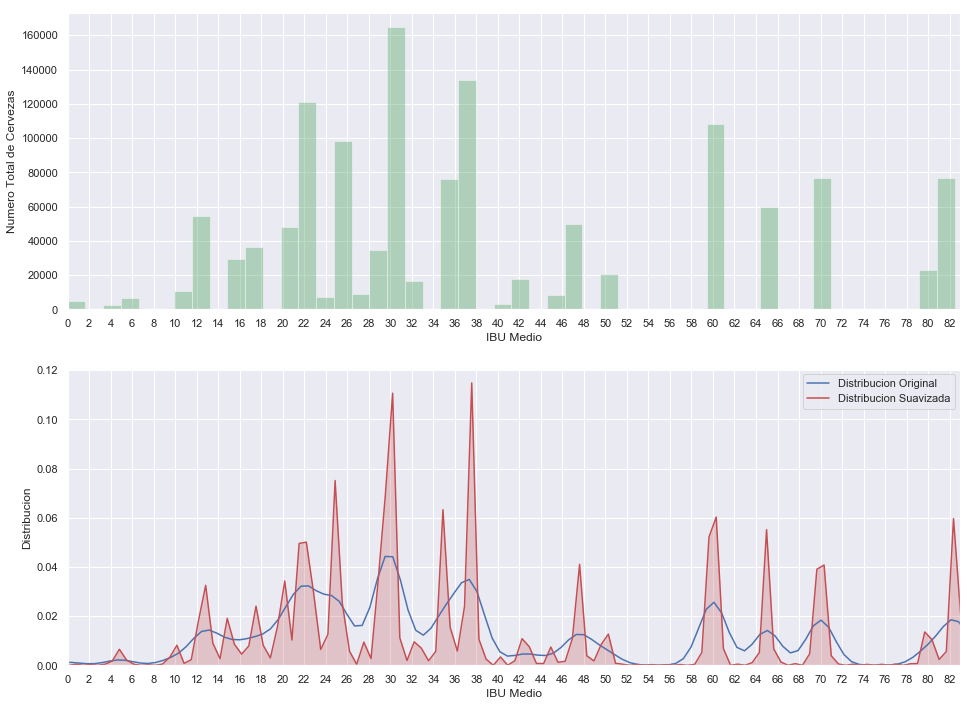

In [43]:
sns.set(rc={"axes.grid": True})
fig, subplot = plt.subplots(nrows=2, figsize=[16, 12])
plt.setp(subplot, xticks=range(0, 84, 2))

sns.distplot(dfreviewsAux['beer_style_ibu_avg'], bins=50, ax=subplot[0], kde=False, color="g") 
             #fit=stats.gamma) #, rug=True)
subplot[0].set_xlim(0, 83)
subplot[0].set_xlabel("IBU Medio")
subplot[0].set_ylabel("Numero Total de Cervezas")

sns.kdeplot(dfreviewsAux['beer_style_ibu_avg'], ax=subplot[1], color="b", label="Distribucion Original")
sns.kdeplot(dfreviewsAux['beer_style_ibu_avg'], ax=subplot[1], color="r", bw=0.4, shade=True, label="Distribucion Suavizada")
             
subplot[1].set_xlim(0, 83)
subplot[1].set_xlabel("IBU Medio")
subplot[1].set_ylabel("Distribucion");

#### 2.6.- ANALIZAREMOS LA POSIBLE RELACION ENTRE EL IBU MEDIO POR ESTILO DE CERVEZA DE LAS VALORACIONES DE LAS CERVEZAS DE ESE ESTILO Y LOS PARAMETROS DE VALORACION DE CERVEZAS (DISTRIBUCION GRAFICA DE VIOLIN)

In [44]:
# REPETIMOS EL REDONDEO a VALORES ENTEROS de los TARGETS para asegurarnos que tendran VALORES 1, 2, 3, 4 y 5 y,
# para convertirlas en VARAIBLES CATEGORICAS para el grafico VIOLINPLOT
dfreviewsAux["review_appearance"] = np.round(dfreviewsAux["review_appearance"])
dfreviewsAux["review_aroma"]      = np.round(dfreviewsAux["review_aroma"])
dfreviewsAux["review_palate"]     = np.round(dfreviewsAux["review_palate"])
dfreviewsAux["review_taste"]      = np.round(dfreviewsAux["review_taste"])
dfreviewsAux["review_overall"]    = np.round(dfreviewsAux["review_overall"])
dfreviewsAux["review_average"]    = np.round(dfreviewsAux["review_average"])

dfreviewsAux["review_appearance"] = dfreviewsAux["review_appearance"].astype(int)
dfreviewsAux["review_aroma"]      = dfreviewsAux["review_aroma"].astype(int)
dfreviewsAux["review_palate"]     = dfreviewsAux["review_palate"].astype(int)
dfreviewsAux["review_taste"]      = dfreviewsAux["review_taste"].astype(int)
dfreviewsAux["review_overall"]    = dfreviewsAux["review_overall"].astype(int)
dfreviewsAux["review_average"]    = dfreviewsAux["review_average"].astype(int)

In [45]:
dfreviewsAux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301173 entries, 0 to 1301172
Data columns (total 14 columns):
brewery_name            1301173 non-null category
beer_name               1301173 non-null category
beer_style              1301173 non-null category
beer_advocates_style    1301173 non-null category
beer_abv                1301173 non-null float64
review_profilename      1301173 non-null category
review_overall          1301173 non-null int64
review_aroma            1301173 non-null int64
review_appearance       1301173 non-null int64
review_palate           1301173 non-null int64
review_taste            1301173 non-null int64
review_average          1301173 non-null int64
abv_strength            1301173 non-null int64
beer_style_ibu_avg      1301173 non-null float64
dtypes: category(5), float64(2), int64(7)
memory usage: 101.2 MB


In [46]:
dfreviewsAux.describe()

,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,abv_strength,beer_style_ibu_avg
count,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06,1.301173e+06
mean,7.134884e+00,3.816773e+00,3.771493e+00,3.858343e+00,3.778479e+00,3.799090e+00,3.810586e+00,2.837179e+00,3.940508e+01
std,2.332543e+00,6.522566e-01,6.460439e-01,5.424042e-01,6.309443e-01,6.641723e-01,5.792448e-01,7.831486e-01,2.047807e+01
min,3.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.300000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,2.500000e+01
50%,6.600000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.500000e+01
75%,8.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,6.000000e+01
max,4.100000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,8.250000e+01


#### GRAFICO DISTRIBUCION TIPO VIOLIN

El grafico de DISTRIBUCION TIPO VIOLIN mostraran la DISTRIBUCION DE VALORES DE IBU MEDIO por cada VALOR 1 a 5 de cada PARAMETRO DE REVIEW

###### RELACION DE IBU MEDIO DE ESTILO DE CERVEZA CON PARAMETROS DE VALORACION DE CERVEZAS:

'review_aroma', 'review_taste', 'review_palate', 'review_appearance', 'review_overall' Y 'review_average'

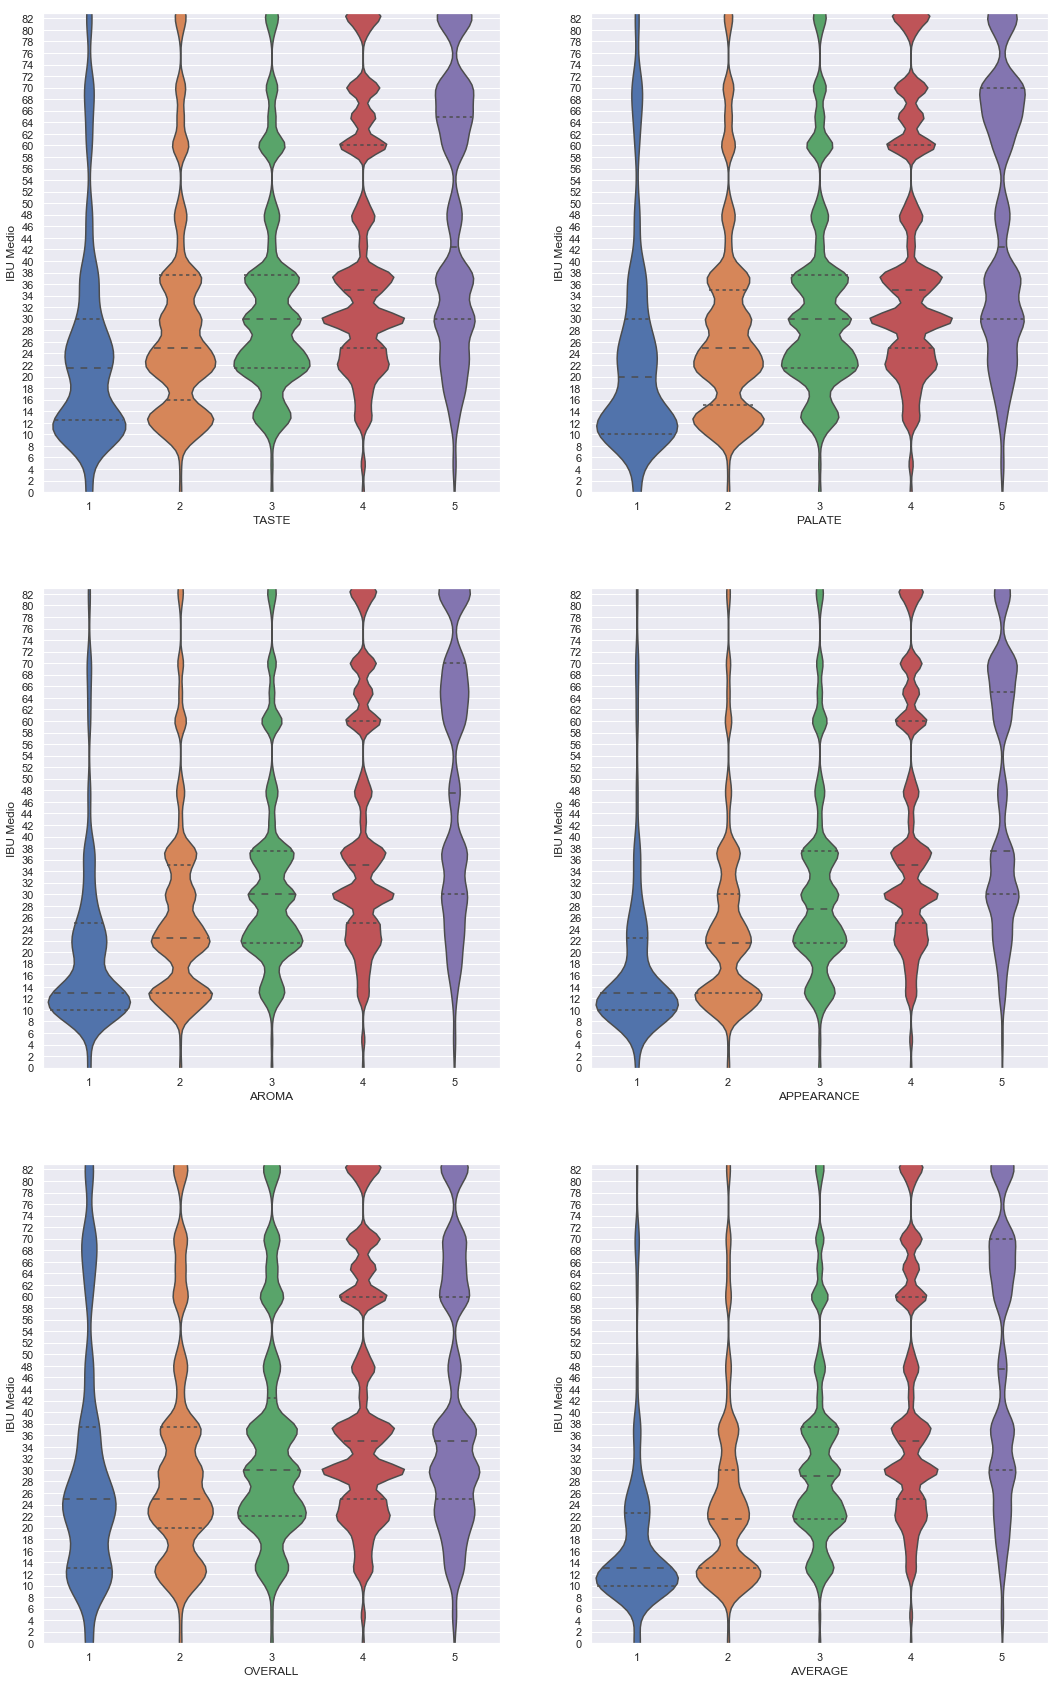

In [47]:
sns.set(rc={"axes.grid": True})
fig, subplot = plt.subplots(nrows=3, ncols=2, figsize=[18, 30])
plt.setp(subplot, yticks=range(0, 84, 2))

xLabels = [['TASTE', 'PALATE'],
           ['AROMA', 'APPEARANCE'],
           ['OVERALL', 'AVERAGE']]

xReviews = [['review_taste', 'review_palate'],
            ['review_aroma', 'review_appearance'],
            ['review_overall', 'review_average']]


for i in range(3):
    for j in range(2):
        sns.violinplot(x=xReviews[i][j], y='beer_style_ibu_avg', data=dfreviewsAux, 
                       ax=subplot[i, j], saturation=0.9, width=0.9, inner="quartile")
        subplot[i, j].set_ylim(0, 83);
        subplot[i, j].set_ylabel("IBU Medio")
        subplot[i, j].set_xlabel(xLabels[i][j])

#### CONCLUSIONES DEL GRAFICO VIOLINPLOT

Se puede estimar que:

1.- PALATE, APPEARANCE:

    1.a.- La mayoria de las Mejores Valoraciones, entre 3 (Esta bien) y 5 (La mejor del mundo), son para IBU Medio entre 20 (Medio Amarga) y 38 (Bastante Amarga) y, otro buen numero entre 60 y 72 (Muy Amarga).
    
    1.b.-Curiosamente, la mayoria de las Peores Valoraciones de 1 (Horrible) y 2 (Mala), son para la franja de IBU Medio entre 1 y 18 aproximadamente (Poco y Medio Amarga).

2.- TASTE: 

    2.a.- La mayoria de las Mejores Valoraciones como para PALATE y APPEARANCE.
    
    2.b.- Se aprecia un cambio ya que la mayoria de las Peores Valoraciones de 1 y 2, son para la franja de IBU Medio entre 1 y 40 aproximadamente (Poco a Bastante Amarga).

3.- AROMA:

    3.a.- La mayoria de las Mejores Valoraciones como para PALATE y APPEARANCE.
    
    3.b.- Igual que para TASTE.


###### CONCLUSION FINAL

La unica conclusion clara es similar a la del grafico de la sección anterior (ver 1.a) pero, por otro lado, el cambio es que se aprecia mejor que tambien hay muchas valoraciones malas para la franja de IBU Medio entre 1 y 40 (Poco a Bastante Amarga) por lo cual, creo que no se puede considerar el IBU como un buen candidato para incluir en una formula de scoring.

No obstante, dado que los compradores de cerveza artesana todavia tienen en cuenta esta medida cuando realizan una compra, podria valer como un parametro posterior de filtrado u ordenacion para adaptar la recomendacion al gusto de IBU de un cliente o, para definir su perfil de usuario.

Por otro lado, estas conclusiones parecen confirmar que el IBU parece que no es una buena medida de amargor de la cerveza tal y como expone el siguiente articulo:

##### LOS IBUS, EL (NO) INDICADOR DEL AMARGOR DE LA CERVEZA, ¿ES BUENA MEDIDA DE AMARGOR?

https://www.cervezartesana.es/blog/post/los-ibus-el-no-indicador-del-amargor-de-la-cerveza.html

    a.- El método de calculo de IBU usado comunmente no es lo bastante cientifico.

    b.- Aunque fuera un método suficientemente científico, todavía existe el inconveniente de que no tiene en cuenta mas factores que tambien influyen en el amargor de una cerveza.

#### 2.6.- CORRELACION ENTRE IBU MEDIO DEL ESTILO DE CERVEZA Y LOS PARAMETROS DE REVISION.

Las correlaciones nos sorprenden como paso anteriormente con el ABV pero SON MAS BAJAS y cambia el orden de los porcentajes mas altos en PALATE, APPEARANCE y TASTE. 

El IBU Medio tiene un pequeño grado de correlacion con AROMA (23%), APPEARANCE (21%), PALATE (20%), TASTE (19%), una correlacion que no es desdeñable y demuestra cierta influencia en esos tres parametros de una cerveza y, de forma indirecta en la valoracion OVERALL.

In [48]:
reviewParams = ['beer_style_ibu_avg', \
                'review_taste', 'review_palate', 'review_aroma', 'review_appearance']

# Create a correlation matrix 
corrMetrics2 = dfreviewsAux[reviewParams].corr()
corrMetrics2.style.background_gradient(cmap='YlGnBu')

,beer_style_ibu_avg,review_taste,review_palate,review_aroma,review_appearance
beer_style_ibu_avg,1,0.195932,0.202216,0.235699,0.212185
review_taste,0.195932,1,0.643513,0.627983,0.456385
review_palate,0.202216,0.643513,1,0.533258,0.477887
review_aroma,0.235699,0.627983,0.533258,1,0.484115
review_appearance,0.212185,0.456385,0.477887,0.484115,1


In [49]:
# Para un DIAGRAMA DE BARRAS quitare la columna de correlacion de 'beer_style_ibu_avg'
paramsCorr2 = corrMetrics2[['beer_style_ibu_avg']] \
    .drop(['beer_style_ibu_avg']) \
    .reset_index() \
    .rename(columns = {'index' : 'review_parameter'}) \
    .sort_values('beer_style_ibu_avg', ascending=False)
paramsCorr2

,review_parameter,beer_style_ibu_avg
2,review_aroma,0.235699
3,review_appearance,0.212185
1,review_palate,0.202216
0,review_taste,0.195932


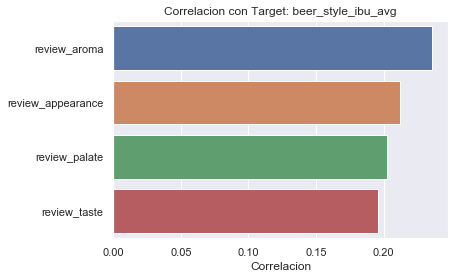

<Figure size 864x576 with 0 Axes>

In [50]:
# DIAGRAMA DE BARRAS SEABORN DE CORRELACION DE LOS PARAMETROS DE REVISION CONTRA EL IBU MEDIO DEL ESTILO DE CERVEZA
sns.barplot(data=paramsCorr2, y="review_parameter", x="beer_style_ibu_avg")
plt.ylabel(""); 
plt.xlabel("Correlacion")
plt.title("Correlacion con Target: beer_style_ibu_avg")
plt.figure(figsize=(12,8))
plt.show()

## 3.- CORRELACION ENTRE LOS PARAMETROS DE REVISION Y LA REVISION GLOBAL 'review_overall' (TARGET)

El objetivo es estudiar la CORRELACION y la IMPORTANCIA de los PARAMETROS DE REVISION DE LAS CERVEZAS para crear una SCORING FORMULA basandonos en ese estudio.

Como punto de partida usaremos la SCORING FORMULA DE PUNTUACION (SCORING FORMULA) del BeerAdvocate's rating system.

## (1º) BeerAdvocate's rating system: REVIEW PARAMETERS CORRELATION

https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/

BeerAdvocate's rating system
.. the final user rating is calculated using our weighted rating system, wherein certain attributes are applied with more importance.

1.- Taste = review_taste = 40%

#### 2.- Smell = review_aroma = 24%

3.- Mouthfeel (Feel) = review_palate = 10%

4.- Appearance (Look) = review_appearance = 6%

5.- Overall = review_overall = 20%

###### BeerAdvocates SCORING FORMULA:

    ##### BeerAdvocate Score = (review_taste * 0.4) + (review_aroma * 0.24) + (review_palate * 0.10) + (review_appearance * 0.06) + (review_overall * 0.20)


#### MATRIZ DE CORRELACION DE LOS PARAMETROS DE REVISION Y LA REVISION GLOBAL 'review_overall' (TARGET)

'review_overall' = Correlations('review_aroma', 'review_taste', 'review_palate', 'review_appearance')

In [51]:
# Heatmap de Pandas
# Lista de Los Parametros de la Cerveza a Incluir para Correlacionar
reviewParams = ["review_taste", "review_palate", "review_aroma", "review_appearance", "review_overall"]

# Creacion de la MATRIZ DE CORRELACION
corrMetrics = dfreviewsAux[reviewParams].corr()
corrMetrics.style.background_gradient(cmap='YlGnBu')

,review_taste,review_palate,review_aroma,review_appearance,review_overall
review_taste,1,0.643513,0.627983,0.456385,0.714935
review_palate,0.643513,1,0.533258,0.477887,0.609118
review_aroma,0.627983,0.533258,1,0.484115,0.526691
review_appearance,0.456385,0.477887,0.484115,1,0.407179
review_overall,0.714935,0.609118,0.526691,0.407179,1


In [52]:
corrMetrics

,review_taste,review_palate,review_aroma,review_appearance,review_overall
review_taste,1.000000,0.643513,0.627983,0.456385,0.714935
review_palate,0.643513,1.000000,0.533258,0.477887,0.609118
review_aroma,0.627983,0.533258,1.000000,0.484115,0.526691
review_appearance,0.456385,0.477887,0.484115,1.000000,0.407179
review_overall,0.714935,0.609118,0.526691,0.407179,1.000000


In [53]:
# Para un DIAGRAMA DE BARRAS quitare la columna de correlacion de 'review_overall'
paramsCorr = corrMetrics[['review_overall']] \
    .drop(['review_overall']) \
    .reset_index() \
    .rename(columns = {'index' : 'review_parameter'}) \
    .sort_values('review_overall', ascending=False)
paramsCorr

,review_parameter,review_overall
0,review_taste,0.714935
1,review_palate,0.609118
2,review_aroma,0.526691
3,review_appearance,0.407179


### (2º) CORRELACION ENTRE LOS PARAMETROS DE REVISION

Las correlaciones mayores se dan en este ORDEN:

1.- Entre TASTE y OVERALL (71%).

#### 2.- Entre PALATE y OVERALL (61%).

3.- Entre AROMA y OVERALL (53%).

4.- Entre APPEARANCE y OVERALL (41%).

En base a este estudio:

a.- Parece que PALATE tiene mas correlacion con OVERALL que AROMA, o sea, tiene MAS IMPORTANCIA.

b.- Parece que AROMA y APPEARANCE tienen menos importancia respecto a OVERALL. 

c.- No obstante, AROMA tiene correlacion alta con TASTE (63%) y esto no se refleja en la medida de correlacion con OVERALL.

Teniendo en cuenta la composicion de la formula de BeerAdvocate y las correlaciones, 

##### Correlation Score Formula

    (review_taste * 0.4) + (review_palate * 0.24) + (review_aroma * 0.10) + (review_appearance * 0.06) + (review_overall * 0.20)

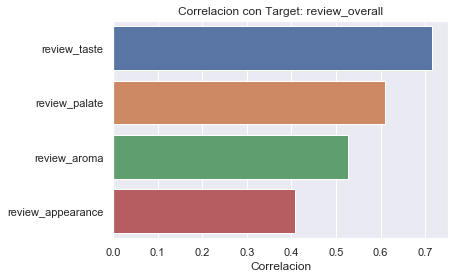

<Figure size 864x576 with 0 Axes>

In [54]:
# DIAGRAMA DE BARRAS SEABORN DE CORRELACION DE LOS PARAMETROS DE REVISION CONTRA LA REVISION GLOBAL
sns.barplot(data=paramsCorr, y="review_parameter", x="review_overall")
plt.ylabel(""); 
plt.xlabel("Correlacion")
plt.title("Correlacion con Target: review_overall")
plt.figure(figsize=(12,8))
plt.show()

### PARA OBTENER LA IMPORTANCIA (PESO) DE LOS PARAMETROS DE VALORACION USAREMOS UN MODELO  DE REGRESION Decission Tree

In [55]:
# MEDIDAS
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# GRID SEARCH CV VALIDATION para encontrar el Mejor MODELO DE DecisionTreeRegressor, sus Mejores Parametros
from sklearn.model_selection import GridSearchCV

# DECISSION TREE MODEL ...
from sklearn.tree import DecisionTreeRegressor

In [56]:
# Entradas del Modelo de Regresion Decission Tree
X = dfreviewsAux[['review_taste', 'review_palate', 'review_aroma', 'review_appearance']]
y = dfreviewsAux['review_overall']

In [57]:
# CREACION DE MODELO Y ENTRENAMIENTO POSTERIOR CON GridSearchCV PARA BUSCAR MEJORES PARAMETROS
regd_grid = GridSearchCV(DecisionTreeRegressor(),
                        param_grid = {"max_depth": np.arange(2,10),
                                      "min_samples_leaf": [10,30,50,100]
                        },
                        cv = 5,
                        scoring = "neg_mean_absolute_error")

In [58]:
# ENTRENAMOS PARA PROBAR LAS POSIBLES COMBINACIONES DE PARAMETROS DEL DecisionTreeRegressor
# CON DATSETS TEST Y TRAINING CREADOS CON GridSearchCV
regd_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [59]:
# MEJORES VALORES DE LOS PARAMETROS 'max_depth': 4, 'min_samples_leaf': 10 para MODELO DECISSION TREE
regd_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 10}

In [60]:
# scoring=None: ha puesto la MEDIDA POR DEFECTO (SCORE): CORRELATION
regd_grid.best_score_

-0.22564585878680665

In [61]:
# Devuelve el MODELO MODELO DECISSION TREE CON LOS MEJORES VALORES DE PARAMETROS 'max_depth': 4, 'min_samples_leaf': 30
regd_grid_final = regd_grid.best_estimator_

In [62]:
# RMSE, 43% algo alejada del valor de MAE pero,
# estimo que es porque los parametros que tienen correlacion mas baja y producen un error mas alto
np.sqrt(np.abs(cross_val_score(regd_grid_final,X,y,cv=5,scoring="neg_mean_squared_error"))).mean()

0.4330178394271506

In [63]:
# MAE, 22% de ERROR
np.abs(cross_val_score(regd_grid_final,X,y,cv=5,scoring="neg_mean_absolute_error")).mean()

0.22564586792877045

In [64]:
fi = regd_grid_final.feature_importances_
fi

array([9.41049223e-01, 5.78606768e-02, 3.88153265e-04, 7.01946495e-04])

In [65]:
print(fi)

[9.41049223e-01 5.78606768e-02 3.88153265e-04 7.01946495e-04]


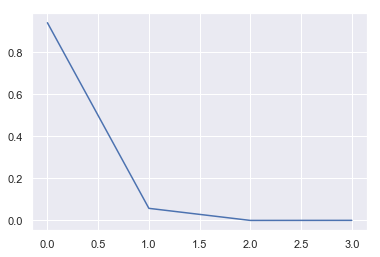

In [66]:
plt.plot(regd_grid_final.feature_importances_)

### (3º) ORDENACION DE MAYOR A MENOR o IMPORTANCIA DE feature_importances_, ES DISTINTA AL RESULTADO DEL ESTUDIO DE CORRELACIONES.

El AROMA tiene MENOS IMPORTANCIA que el PALATE y la APPEARANCE:

1.- review_taste (94),

2.- review_palate (5,8),

3.- review_appearance (0,7),
#### 4.- review_aroma  (0,3)

Teniendo en cuenta la composicion de la formula de BeerAdvocate y las correlaciones, 


##### Importance Score Formula

    (review_taste * 0.4) + (review_palate * 0.24) + (review_appearance * 0.10) + (review_aroma * 0.06) + (review_overall * 0.20)


No obstante, cabe resaltar que en los 3 analisis previos, TASTE es la que tiene mas correlacion o importancia respecto a OVERALL.

In [67]:
# VAMOS A MOSTRAR EN FORMA TABULAR EL ARRAY DE feature_importances_
from tabulate import tabulate

In [68]:
headers = ["Parametro Revision", "Peso / Importancia"]
values = sorted(zip(X.columns, regd_grid_final.feature_importances_), key=lambda x: x[1] * -1)
imptab = tabulate(values, headers, tablefmt="plain")
print(type(imptab))
print(imptab)

<class 'str'>
Parametro Revision      Peso / Importancia
review_taste                   0.941049
review_palate                  0.0578607
review_appearance              0.000701946
review_aroma                   0.000388153


## 4.- AVANCE: POSIBLES FORMULAS DE PUNTUACION (SCORING FORMULAS) PARA EL SISTEMA DE RECOMENDACION

Los fundadores de BeerAdvocate despues de su estudio de negocio de varios años han creado una formula de scoring a la hora de puntuar cada cerveza y la usaremos como base para crear otras alternativas teniendo en cuenta las conclusiones de mis analisis previos de relaciones entre parametros de valoracion.

Veremos las diferencias de listas de cervezas y estilos se devolverian segun la ordenacion resultante de la puntuacion de cada formula de scoring.

In [69]:
def score_essay(grouping_col, score_function, ranking_limit):
    dfreviewsAux = reviews_raw.copy()
    
    dfreviewsAux = dfreviewsAux.groupby(grouping_col) \
        .agg({'review_taste' : 'mean', 'review_aroma' : 'mean', 'review_appearance' : 'mean', \
          'review_palate' : 'mean', 'review_overall': 'mean', 'review_profilename' : 'count'}) \
        .reset_index() \
        .rename(columns = {'review_profilename': 'number_of_reviews'})

    dfreviewsAux['ranking_score'] = score_function( \
        dfreviewsAux[['review_taste', 'review_aroma', 'review_appearance', 'review_palate', 'review_overall']])
    dfreviewsAux = dfreviewsAux.sort_values(['ranking_score', 'number_of_reviews'], ascending=False).head(ranking_limit)
    return(dfreviewsAux[[grouping_col, 'number_of_reviews', 'ranking_score', 'review_taste', 'review_aroma', 'review_appearance', 'review_palate', 'review_overall']])
        


### 4.1.- PROPUESTAS DE FORMULAS DE SCORING

1.- Un bebedor de cerveza que diera mas prioridad a AROMA y APPEARANCE su formula de SCORING MANTENIENDO TASTE COMO MAS PRIORITARIO, version 1.

In [70]:
def aroma_appearance_score_1(ratingsdf):
    return(((ratingsdf['review_taste'] * 0.40) + \
            (ratingsdf['review_aroma'] * 0.24) + \
            (ratingsdf['review_appearance'] * 0.10) + \
            (ratingsdf['review_palate'] * 0.06) + \
            (ratingsdf['review_overall'] * 0.20)))

In [71]:
sc1b = score_essay('beer_name', aroma_appearance_score_1, 10)
sc1b

,beer_name,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
1662,Dirty Horse,37,4.669189,4.729730,4.594595,4.391892,4.554054,4.810811
366,Armand'4 Oude Geuze Lente (Spring),54,4.642037,4.675926,4.657407,4.425926,4.601852,4.675926
4592,Rare Bourbon County Stout,234,4.616282,4.754274,4.641026,4.230769,4.570513,4.517094
4425,Pliny The Younger,504,4.609464,4.674603,4.673611,4.391865,4.543651,4.530754
1641,Deviation Bottleworks 9th Anniversary,109,4.603119,4.678899,4.587156,4.353211,4.555046,4.610092
3074,Kaggen! Stormaktsporter,80,4.595625,4.700000,4.587500,4.400000,4.556250,4.506250
6129,Vanilla Bean Aged Dark Lord,136,4.594559,4.676471,4.683824,4.386029,4.636029,4.415441
5959,Trappist Westvleteren 12,1138,4.591353,4.685413,4.534271,4.389719,4.590070,4.572935
6438,Yellow Bus,46,4.586957,4.695652,4.619565,4.043478,4.456522,4.641304
2097,Founders CBS Imperial Stout,568,4.581655,4.676056,4.520246,4.411972,4.547535,4.561620


In [76]:
sc1s = score_essay('beer_advocates_style', aroma_appearance_score_1, 10)
sc1s

,beer_advocates_style,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
32,Belgian Quadrupel (Quad),16856,4.145962,4.209421,4.125237,4.114351,4.122657,4.066712
12,American Imperial Stout,45362,4.140110,4.188892,4.158128,4.160674,4.097956,4.023290
72,German Eisbock,2334,4.135227,4.230934,4.184447,3.957369,4.127464,3.976007
22,American Wild Ale,14282,4.134705,4.176166,4.149244,4.024121,4.061091,4.111714
28,Belgian Gueuze,5419,4.119644,4.144768,4.131390,4.050840,4.064034,4.106385
94,Russian Imperial Stout,48662,4.109086,4.151021,4.073764,4.213000,4.089577,4.021495
30,Belgian Lambic,816,4.085662,4.123162,4.145833,3.929534,3.958946,4.054534
10,American Imperial IPA,76967,4.074111,4.098230,4.104285,4.080223,4.026200,4.000981
84,German Weizenbock,8366,4.058061,4.091979,4.061917,4.024026,4.001434,4.019603
64,Flanders Red Ale,6057,4.048932,4.098564,4.046393,4.007182,3.976308,3.995377


2.- Un bebedor de cerveza que diera mas prioridad a AROMA y APPEARANCE su formula de SCORING CON MAS PESO EN ESOS PARAMETROS Y DESPUES TASTE, version 2.

In [73]:
def aroma_appearance_score_2(ratingsdf):
    return(((ratingsdf['review_aroma'] * 0.40) + \
            (ratingsdf['review_appearance'] * 0.24) + \
            (ratingsdf['review_taste'] * 0.10) + \
            (ratingsdf['review_palate'] * 0.06) + \
            (ratingsdf['review_overall'] * 0.20)))

In [74]:
# HAY DIFERENCIAs respecto a aroma_appearance_score_1: 
# SE USARA aroma_appearance_score_2 POR SER MAS ORIENTADA A aroma y appearance
sc2b = score_essay('beer_name', aroma_appearance_score_2, 10)
sc2b

,beer_name,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
366,Armand'4 Oude Geuze Lente (Spring),54,4.604074,4.675926,4.657407,4.425926,4.601852,4.675926
1662,Dirty Horse,37,4.600270,4.729730,4.594595,4.391892,4.554054,4.810811
4425,Pliny The Younger,504,4.569722,4.674603,4.673611,4.391865,4.543651,4.530754
1179,Cantillon Blåbær Lambik,145,4.555655,4.603448,4.496552,4.620690,4.462069,4.600000
6129,Vanilla Bean Aged Dark Lord,136,4.555074,4.676471,4.683824,4.386029,4.636029,4.415441
2230,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),71,4.554225,4.570423,4.577465,4.471831,4.436620,4.633803
1351,Citra DIPA,237,4.551814,4.554852,4.672996,4.343882,4.356540,4.616034
1641,Deviation Bottleworks 9th Anniversary,109,4.542844,4.678899,4.587156,4.353211,4.555046,4.610092
3074,Kaggen! Stormaktsporter,80,4.535625,4.700000,4.587500,4.400000,4.556250,4.506250
2784,Hoppy Birthday,64,4.529688,4.539062,4.562500,4.390625,4.351562,4.679688


In [77]:
sc2s = score_essay('beer_advocates_style', aroma_appearance_score_2, 10)
sc2s

,beer_advocates_style,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
12,American Imperial Stout,45362,4.131238,4.188892,4.158128,4.160674,4.097956,4.023290
32,Belgian Quadrupel (Quad),16856,4.119183,4.209421,4.125237,4.114351,4.122657,4.066712
22,American Wild Ale,14282,4.109111,4.176166,4.149244,4.024121,4.061091,4.111714
94,Russian Imperial Stout,48662,4.105401,4.151021,4.073764,4.213000,4.089577,4.021495
28,Belgian Gueuze,5419,4.104353,4.144768,4.131390,4.050840,4.064034,4.106385
72,German Eisbock,2334,4.089490,4.230934,4.184447,3.957369,4.127464,3.976007
10,American Imperial IPA,76967,4.072559,4.098230,4.104285,4.080223,4.026200,4.000981
30,Belgian Lambic,816,4.062181,4.123162,4.145833,3.929534,3.958946,4.054534
84,German Weizenbock,8366,4.043738,4.091979,4.061917,4.024026,4.001434,4.019603
64,Flanders Red Ale,6057,4.027791,4.098564,4.046393,4.007182,3.976308,3.995377


3.- Un bebedor de cerveza COMUN que tengas unas PRIORIDADES SIMILARES A LAS DEL ESTUDIO DE importance

In [78]:
def importance_score(ratingsdf):
    return(((ratingsdf['review_taste'] * 0.40) + \
            (ratingsdf['review_palate'] * 0.24) + \
            (ratingsdf['review_appearance'] * 0.10) + \
            (ratingsdf['review_aroma'] * 0.06) + \
            (ratingsdf['review_overall'] * 0.20)))

In [79]:
sc3b = score_essay('beer_name', importance_score, 10)
sc3b

,beer_name,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
1662,Dirty Horse,37,4.661892,4.729730,4.594595,4.391892,4.554054,4.810811
366,Armand'4 Oude Geuze Lente (Spring),54,4.632037,4.675926,4.657407,4.425926,4.601852,4.675926
4592,Rare Bourbon County Stout,234,4.603590,4.754274,4.641026,4.230769,4.570513,4.517094
5959,Trappist Westvleteren 12,1138,4.601397,4.685413,4.534271,4.389719,4.590070,4.572935
1641,Deviation Bottleworks 9th Anniversary,109,4.597339,4.678899,4.587156,4.353211,4.555046,4.610092
3074,Kaggen! Stormaktsporter,80,4.590000,4.700000,4.587500,4.400000,4.556250,4.506250
2097,Founders CBS Imperial Stout,568,4.586567,4.676056,4.520246,4.411972,4.547535,4.561620
4425,Pliny The Younger,504,4.586071,4.674603,4.673611,4.391865,4.543651,4.530754
6129,Vanilla Bean Aged Dark Lord,136,4.585956,4.676471,4.683824,4.386029,4.636029,4.415441
1179,Cantillon Blåbær Lambik,145,4.564138,4.603448,4.496552,4.620690,4.462069,4.600000


In [80]:
sc3s = score_essay('beer_advocates_style', importance_score, 10)
sc3s

,beer_advocates_style,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
32,Belgian Quadrupel (Quad),16856,4.145498,4.209421,4.125237,4.114351,4.122657,4.066712
12,American Imperial Stout,45362,4.129279,4.188892,4.158128,4.160674,4.097956,4.023290
72,German Eisbock,2334,4.124970,4.230934,4.184447,3.957369,4.127464,3.976007
22,American Wild Ale,14282,4.118838,4.176166,4.149244,4.024121,4.061091,4.111714
94,Russian Imperial Stout,48662,4.111932,4.151021,4.073764,4.213000,4.089577,4.021495
28,Belgian Gueuze,5419,4.107520,4.144768,4.131390,4.050840,4.064034,4.106385
10,American Imperial IPA,76967,4.060056,4.098230,4.104285,4.080223,4.026200,4.000981
30,Belgian Lambic,816,4.052022,4.123162,4.145833,3.929534,3.958946,4.054534
84,German Weizenbock,8366,4.047174,4.091979,4.061917,4.024026,4.001434,4.019603
64,Flanders Red Ale,6057,4.036317,4.098564,4.046393,4.007182,3.976308,3.995377


4.- Un bebedor de cerveza MAS EXPERTO O JURADO DE CONCURSO que tengas unas PRIORIDADES SIMILARES A LAS DEL SCORING DE BeerAdvocates

In [81]:
def beeradvocate_score(ratingsdf):
    return(((ratingsdf['review_taste'] * 0.40) + \
            (ratingsdf['review_aroma'] * 0.24) + \
            (ratingsdf['review_palate'] * 0.10) + \
            (ratingsdf['review_appearance'] * 0.06) + \
            (ratingsdf['review_overall'] * 0.20)))

In [82]:
sc4b = score_essay('beer_name', beeradvocate_score, 10)
sc4b

,beer_name,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
1662,Dirty Horse,37,4.675676,4.729730,4.594595,4.391892,4.554054,4.810811
366,Armand'4 Oude Geuze Lente (Spring),54,4.649074,4.675926,4.657407,4.425926,4.601852,4.675926
4592,Rare Bourbon County Stout,234,4.629872,4.754274,4.641026,4.230769,4.570513,4.517094
4425,Pliny The Younger,504,4.615536,4.674603,4.673611,4.391865,4.543651,4.530754
1641,Deviation Bottleworks 9th Anniversary,109,4.611193,4.678899,4.587156,4.353211,4.555046,4.610092
6129,Vanilla Bean Aged Dark Lord,136,4.604559,4.676471,4.683824,4.386029,4.636029,4.415441
6438,Yellow Bus,46,4.603478,4.695652,4.619565,4.043478,4.456522,4.641304
3074,Kaggen! Stormaktsporter,80,4.601875,4.700000,4.587500,4.400000,4.556250,4.506250
5959,Trappist Westvleteren 12,1138,4.599367,4.685413,4.534271,4.389719,4.590070,4.572935
2097,Founders CBS Imperial Stout,568,4.587077,4.676056,4.520246,4.411972,4.547535,4.561620


In [83]:
sc4s = score_essay('beer_advocates_style', beeradvocate_score, 10)
sc4s

,beer_advocates_style,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
32,Belgian Quadrupel (Quad),16856,4.146294,4.209421,4.125237,4.114351,4.122657,4.066712
72,German Eisbock,2334,4.142031,4.230934,4.184447,3.957369,4.127464,3.976007
12,American Imperial Stout,45362,4.137602,4.188892,4.158128,4.160674,4.097956,4.023290
22,American Wild Ale,14282,4.136184,4.176166,4.149244,4.024121,4.061091,4.111714
28,Belgian Gueuze,5419,4.120172,4.144768,4.131390,4.050840,4.064034,4.106385
94,Russian Imperial Stout,48662,4.104149,4.151021,4.073764,4.213000,4.089577,4.021495
30,Belgian Lambic,816,4.086838,4.123162,4.145833,3.929534,3.958946,4.054534
10,American Imperial IPA,76967,4.071950,4.098230,4.104285,4.080223,4.026200,4.000981
84,German Weizenbock,8366,4.057158,4.091979,4.061917,4.024026,4.001434,4.019603
64,Flanders Red Ale,6057,4.047697,4.098564,4.046393,4.007182,3.976308,3.995377


In [84]:
def correlation_score(ratingsdf):
    return(((ratingsdf['review_taste'] * 0.40) + \
            (ratingsdf['review_palate'] * 0.24) + \
            (ratingsdf['review_aroma'] * 0.10) + \
            (ratingsdf['review_appearance'] * 0.06) + \
            (ratingsdf['review_overall'] * 0.20)))

In [85]:
sc5b = score_essay('beer_name', correlation_score, 10)
sc5b

,beer_name,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
1662,Dirty Horse,37,4.670000,4.729730,4.594595,4.391892,4.554054,4.810811
366,Armand'4 Oude Geuze Lente (Spring),54,4.641296,4.675926,4.657407,4.425926,4.601852,4.675926
4592,Rare Bourbon County Stout,234,4.620000,4.754274,4.641026,4.230769,4.570513,4.517094
5959,Trappist Westvleteren 12,1138,4.607179,4.685413,4.534271,4.389719,4.590070,4.572935
1641,Deviation Bottleworks 9th Anniversary,109,4.606697,4.678899,4.587156,4.353211,4.555046,4.610092
6129,Vanilla Bean Aged Dark Lord,136,4.597868,4.676471,4.683824,4.386029,4.636029,4.415441
3074,Kaggen! Stormaktsporter,80,4.597500,4.700000,4.587500,4.400000,4.556250,4.506250
4425,Pliny The Younger,504,4.597341,4.674603,4.673611,4.391865,4.543651,4.530754
2097,Founders CBS Imperial Stout,568,4.590898,4.676056,4.520246,4.411972,4.547535,4.561620
6438,Yellow Bus,46,4.580652,4.695652,4.619565,4.043478,4.456522,4.641304


In [86]:
sc5s = score_essay('beer_advocates_style', correlation_score, 10)
sc5s

,beer_advocates_style,number_of_reviews,ranking_score,review_taste,review_aroma,review_appearance,review_palate,review_overall
32,Belgian Quadrupel (Quad),16856,4.145933,4.209421,4.125237,4.114351,4.122657,4.066712
72,German Eisbock,2334,4.134053,4.230934,4.184447,3.957369,4.127464,3.976007
12,American Imperial Stout,45362,4.129178,4.188892,4.158128,4.160674,4.097956,4.023290
22,American Wild Ale,14282,4.123843,4.176166,4.149244,4.024121,4.061091,4.111714
28,Belgian Gueuze,5419,4.110742,4.144768,4.131390,4.050840,4.064034,4.106385
94,Russian Imperial Stout,48662,4.106362,4.151021,4.073764,4.213000,4.089577,4.021495
10,American Imperial IPA,76967,4.061018,4.098230,4.104285,4.080223,4.026200,4.000981
30,Belgian Lambic,816,4.060674,4.123162,4.145833,3.929534,3.958946,4.054534
84,German Weizenbock,8366,4.048690,4.091979,4.061917,4.024026,4.001434,4.019603
64,Flanders Red Ale,6057,4.037885,4.098564,4.046393,4.007182,3.976308,3.995377


### 4.2.- ANALISIS DE LOS RANKINGS DE LAS DISTINTAS FORMULAS DE SCORING APLICADAS A CERVEZAS

1.- El ranking aro_ape_2_ranking es muy distinto del aro_ape_1_ranking.

2.- Los rankings importance_ranking, BeerAdvocates_ranking y correlation_ranking, tienen las 5 primeras cervezas practicamente iguales y a partir de las 6 aunque son casi las mismas tienen distinta ordenacion.
Por lo tanto, parece que :

2.a.- Las cervezas de BeerAdvocates_ranking tambien son ofrecidas por importance_ranking y correlation_ranking

2.b.- Las cervezas de importance_ranking y correlation_ranking siendo casi las mismas cambian la ordenacion a partir del sexto puesto

Con este punto de vista, elegiria usar las dos formulas:

I.- importance_ranking para publico general pero BeerAdvocates_ranking tambien cubriria mejor al publico experto

II.- aro_ape_2_ranking para publico muy enfocado a AROMA y APPERANCE como bebedores expertos y miembros de un jurado


In [87]:
print('Beers Ranking vs Scoring Formulas')
dfscoredbeers = pd.concat( \
                [sc1b['beer_name'].reset_index().drop('index', axis=1), \
                 sc2b['beer_name'].reset_index().drop('index', axis=1), \
                 sc3b['beer_name'].reset_index().drop('index', axis=1), \
                 sc4b['beer_name'].reset_index().drop('index', axis=1), \
                 sc5b['beer_name'].reset_index().drop('index', axis=1)],
                 axis=1)
dfscoredbeers.columns = ['aro_ape_1_ranking', 'aro_ape_2_ranking', \
                         'importance_ranking', 'BeerAdvocates_ranking', 'correlation_ranking']
#dfscoredbeers.info()
dfscoredbeers

Beers Ranking vs Scoring Formulas


,aro_ape_1_ranking,aro_ape_2_ranking,importance_ranking,BeerAdvocates_ranking,correlation_ranking
0,Dirty Horse,Armand'4 Oude Geuze Lente (Spring),Dirty Horse,Dirty Horse,Dirty Horse
1,Armand'4 Oude Geuze Lente (Spring),Dirty Horse,Armand'4 Oude Geuze Lente (Spring),Armand'4 Oude Geuze Lente (Spring),Armand'4 Oude Geuze Lente (Spring)
2,Rare Bourbon County Stout,Pliny The Younger,Rare Bourbon County Stout,Rare Bourbon County Stout,Rare Bourbon County Stout
3,Pliny The Younger,Cantillon Blåbær Lambik,Trappist Westvleteren 12,Pliny The Younger,Trappist Westvleteren 12
4,Deviation Bottleworks 9th Anniversary,Vanilla Bean Aged Dark Lord,Deviation Bottleworks 9th Anniversary,Deviation Bottleworks 9th Anniversary,Deviation Bottleworks 9th Anniversary
5,Kaggen! Stormaktsporter,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),Kaggen! Stormaktsporter,Vanilla Bean Aged Dark Lord,Vanilla Bean Aged Dark Lord
6,Vanilla Bean Aged Dark Lord,Citra DIPA,Founders CBS Imperial Stout,Yellow Bus,Kaggen! Stormaktsporter
7,Trappist Westvleteren 12,Deviation Bottleworks 9th Anniversary,Pliny The Younger,Kaggen! Stormaktsporter,Pliny The Younger
8,Yellow Bus,Kaggen! Stormaktsporter,Vanilla Bean Aged Dark Lord,Trappist Westvleteren 12,Founders CBS Imperial Stout
9,Founders CBS Imperial Stout,Hoppy Birthday,Cantillon Blåbær Lambik,Founders CBS Imperial Stout,Yellow Bus


### 4.3.- ANALISIS DE LOS RANKINGS DE LAS DISTINTAS FORMULAS DE SCORING APLICADAS A ESTILOS DE CERVEZAS

1.- El ranking aro_ape_2_ranking es muy distinto del aro_ape_1_ranking.

2.- Los rankings BeerAdvocates_ranking y correlation_ranking son iguales y, importance_ranking, tiene las 5 primeros estilos practicamente iguales y a partir del 6 aunque son casi las mismos tienen distinta ordenacion.

Por lo tanto, parece que :

2.a.- Las estilos de BeerAdvocates_ranking tambien son ofrecidas por importance_ranking y correlation_ranking

2.b.- Las estilos de importance_ranking y correlation_ranking siendo casi las mismas cambian la ordenacion a partir del sexto puesto

Con este punto de vista, elegiria usar tambien las mismas formulas:

I.- importance_ranking para publico general pero BeerAdvocates_ranking tambien cubriria mejor al publico experto

II.- aro_ape_2_ranking para publico muy enfocado a AROMA y APPERANCE como bebedores expertos y miembros de un jurado


In [88]:
print('Beer Styles Ranking vs Scoring Formulas')
dfscoredstyles = pd.concat( \
                 [sc1s['beer_advocates_style'].reset_index().drop('index', axis=1), \
                  sc2s['beer_advocates_style'].reset_index().drop('index', axis=1), \
                  sc3s['beer_advocates_style'].reset_index().drop('index', axis=1), \
                  sc4s['beer_advocates_style'].reset_index().drop('index', axis=1), \
                  sc5s['beer_advocates_style'].reset_index().drop('index', axis=1)],
                  axis=1)
dfscoredstyles.columns = ['aro_ape_1_ranking', 'aro_ape_2_ranking', \
                         'importance_ranking', 'BeerAdvocates_ranking', 'correlation_ranking']
#dfscoredbeers.info()
dfscoredstyles

Beer Styles Ranking vs Scoring Formulas


,aro_ape_1_ranking,aro_ape_2_ranking,importance_ranking,BeerAdvocates_ranking,correlation_ranking
0,Belgian Quadrupel (Quad),American Imperial Stout,Belgian Quadrupel (Quad),Belgian Quadrupel (Quad),Belgian Quadrupel (Quad)
1,American Imperial Stout,Belgian Quadrupel (Quad),American Imperial Stout,German Eisbock,German Eisbock
2,German Eisbock,American Wild Ale,German Eisbock,American Imperial Stout,American Imperial Stout
3,American Wild Ale,Russian Imperial Stout,American Wild Ale,American Wild Ale,American Wild Ale
4,Belgian Gueuze,Belgian Gueuze,Russian Imperial Stout,Belgian Gueuze,Belgian Gueuze
5,Russian Imperial Stout,German Eisbock,Belgian Gueuze,Russian Imperial Stout,Russian Imperial Stout
6,Belgian Lambic,American Imperial IPA,American Imperial IPA,Belgian Lambic,American Imperial IPA
7,American Imperial IPA,Belgian Lambic,Belgian Lambic,American Imperial IPA,Belgian Lambic
8,German Weizenbock,German Weizenbock,German Weizenbock,German Weizenbock,German Weizenbock
9,Flanders Red Ale,Flanders Red Ale,Flanders Red Ale,Flanders Red Ale,Flanders Red Ale


### MIS CONCLUSIONES

A la hora de calcular una puntuacion o score para crear un ranking de cervezas que se usara en un Recomendador hemos descubierto que, de alguna forma, tendremos que usar al menos dos distintas para poder abarcar los dos tipos de bebedores principales:

1.- Para el bebedor general y el mas experimentado o cualificado para hacer valoraciones (fundadores de BeerAdvocate despues de su estudio de negocio de varios años o un jurado de una competicion) dan mas importancia o peso al AROMA (Smell) frente al PALATE (Mouthfeel):

##### BeerAdvocate Score

    (review_taste * 0.4) + (review_aroma * 0.24) + (review_palate * 0.10) + (review_appearance * 0.06) + (review_overall * 0.20)


2.- No obstante, si un bebedor diera mas prioridad a AROMA y APPEARANCE su formula de SCORING seria DISTINTA:

##### Aro&App Score Formula 2

    (review_aroma * 0.4) + (review_appearance * 0.24) + (review_taste * 0.10) + (review_palate * 0.06) + (review_overall * 0.20)


3.- Opcionalmente, podria tener una tercera formula de scoring solo para el public general integrada en el Recomendador:

##### Importance Score Formula

    (review_taste* 0.4) + (review_palate * 0.24) + (review_appearance * 0.10) + (review_aroma * 0.06) + (review_overall * 0.20)

Al final, intentaremos usar una formula de scoring u otra segun el gusto (perfil) del usuario para conseguir personalizar un poco mas la recomendacion.